* Student name: __Daniel M. Smith__
* Student pace: __Full Time Online__
* Scheduled project review date/time: __May 4, 2021 11 AM__
* Instructor name: __Project Reviewer: Claude Fried__ <br> __Cohort Lead: Abhineet Kulkarni__
                 
* Blog post URL: https://danielmsmith1.medium.com/pivot-vs-pivottable-vs-groupby-2d8723beb782


Daniel M. Smith <br>
Movie Studio Project Phase 1 Flatiron School

# Business Understanding
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Data Mining 
Initial data was provided and can be downloaded [here](https://github.com/learn-co-curriculum/dsc-phase-1-project/tree/master/zippedData).

# Data Cleaning 

In this workbook we:
1. Load the data into pandas DataFrames
2. Inspect and observe the DataFrames
3. Clean and convert the data into appropriate types


## Initial Reading of data files

In [1]:
import pandas as pd
import numpy as nm
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

path = './data/zippedData/'

In [2]:
#helper to list all csv or type files in a dir
def find_csv_filenames( path_to_dir, suffix=".csv"):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

#creates dataframes for type specified
def create_dfs(filelist, suffix=".csv" ):
    #Read all the files and store in a dataFrame
    # the data Frames for each file will be listed in a dict 
    # where key is the name and value is the df
    dict_csv_files = {}
    
    for filename in csvfiles:
        filename_cleaned = filename.replace(".csv", "").replace(".","_")#cleaning
        filename_df = pd.read_csv(path + filename, index_col = 0, encoding='utf8')
        dict_csv_files[filename_cleaned] = filename_df
    return dict_csv_files    


In [3]:
#Create csvfiles, tsvfiles and call createdfs dict
csvfiles = find_csv_filenames(path)
tsvfiles = find_csv_filenames(path,'.tsv')
dict_dfs = create_dfs(csvfiles, suffix=".csv" )

In [4]:
dict_dfs.keys()

dict_keys(['bom_movie_gross', 'imdb_name_basics', 'imdb_title_akas', 'imdb_title_basics', 'imdb_title_crew', 'imdb_title_principals', 'imdb_title_ratings', 'tmdb_movies', 'tn_movie_budgets', 'tn_movie_budgets_changed'])

In [5]:
##Create Working DataFrames
df_bom = dict_dfs['bom_movie_gross']
df_imdb_name = dict_dfs['imdb_name_basics']       
df_imdb_akas = dict_dfs['imdb_title_akas']       
df_imdbbasics = dict_dfs['imdb_title_basics']    
df_imdb_crew = dict_dfs['imdb_title_crew']     
df_imdb_principals = dict_dfs['imdb_title_principals']     
df_imdb_ratings = dict_dfs['imdb_title_ratings']         
df_tmb = dict_dfs['tmdb_movies']                        
df_tn_movie_budget = dict_dfs['tn_movie_budgets']
#Excluding rott.tsvfiles  df_rott_info = dict_dfs(' pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
#df_rott_rev = dict_dfs(' pd.read_csv('zippedData/rt.reviews.tsv',encoding= 'unicode_escape', sep='\t')

## Inspect DataFrames
Inspecting the dfs, Noting observations about the data, describing the data types.  
We have 9 DataFrames from the 9 files:  
df_bom  
df_imdb_name   
df_imdb_akas   
df_imdbbasics   
df_imdb_crew  
df_imdb_principals      
df_imdb_ratings          
df_tmb        
df_tn_movie_budget  

### Box Office Mojo-df_bom

In [6]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [7]:
df_bom.head(3)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


#### Observation df_bom (Box office Mojo) 
It looks as if the data is for 2010 to 2018 movies 
of domestic and foreign gross in dollars.   
Foreign gross needs to be converted to int datatype.

### IMDB name basics-df_imdb_name

In [8]:
df_imdb_name.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        606648 non-null  object 
 1   birth_year          82736 non-null   float64
 2   death_year          6783 non-null    float64
 3   primary_profession  555308 non-null  object 
 4   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


In [9]:
df_imdb_name.head(3)

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"


#### Observation df_imdb_name 
It looks as if the data is a name and profession
and known for these movie titles.  
The birth year and death year can be dropped as 
there is a high percentage of data missing from those columns.

### IMDB akas-df_imdb_akas

In [10]:
df_imdb_akas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           331703 non-null  int64  
 1   title              331703 non-null  object 
 2   region             278410 non-null  object 
 3   language           41715 non-null   object 
 4   types              168447 non-null  object 
 5   attributes         14925 non-null   object 
 6   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


In [11]:
df_imdb_akas.head(3)

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0


#### Observation df_imdb_akas
This data looks to be aka movie names in non domestic markets.  There are lots of NaNs.  Should we just look at isoriginal title as 1?  Where does the title_id link to?  Is ok to leave NaNs alone?

### IMDBTitle basics-df_imdbbasics

In [12]:
df_imdbbasics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [13]:
df_imdbbasics.tail(3)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


#### Observation df_df_imdbbasics
This data has primary title and original title and year and genre of the movie.  Many missing runtime minutes can set to 90 mins?  Main point here is the genre and year and title.

### IMDB Crew-df_imfb_crew

In [14]:
df_imdb_crew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  140417 non-null  object
 1   writers    110261 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [15]:
df_imdb_crew.head(3)

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585


#### Observation df_df_imdb_crew
This df matches directors and writers to tconst which is primary key in df_imdbbasics and df_imdb_principals.

### IMDB principals - df_imfb_principals

In [16]:
df_imdb_principals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         177684 non-null   object
 4   characters  393360 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


In [17]:
df_imdb_principals.head(3)

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN


#### Observation df_imdb_principals
This data lists the roles of principals in movies(tconst) to categories and job and characters if they act.            
  Links to df_imdb_crew, df_imdbbasics, df_imdb_name, df_imdb_ratings.             
      nconst links to values in the df_imdb_crew and df_imdb_name listing the directors and writers.

### IMDB ratings-df_imfb_ratings

In [18]:
df_imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


In [19]:
df_imdb_ratings.head(3)

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20


#### Observation df_imdb_ratings
Pretty straightforward rating and number of votes.  title tconst links to tconst(title) in other imdb tables.

### TMB-df_tmb



In [20]:
##The Movie DB
df_tmb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [21]:
df_tmb.tail(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


#### Observation df_tmb
There are no Nans.  This looks to be good data about the movies and genres.  
Release date is an object and may be converted to a datatime if to be used.  Where to look up genre_ids?



### TN The Numbers-df_tn_movie_budget

In [22]:
##The Numbers
df_tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [23]:
df_tn_movie_budget.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


#### Observation df_tn_movie_budget
There are no Nans.  This data is the movies, release date 
and worldwide gross with production budget.    Money data should be converted to 
int and dollas signs removed
Release date is an object and may be converted to a datatime if to be used.

<br><br><br><br><br><br>



## Data Cleaning and Typing
Removing the NanNs, dropping columns which have no importance or too many nans, converting object datatypes to be useful.

### <font color="green">Clean df_bom data</font>

In [24]:
df_bom.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [25]:
df_bom.shape

(3387, 4)

In [26]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [27]:
#If NaN setting to 0..
df_bom.fillna(0, inplace=True)

In [28]:
df_bom.isna().sum()

studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [29]:
df_bom.info()
#Need to convert the foreign gross to float

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3387 non-null   object 
 1   domestic_gross  3387 non-null   float64
 2   foreign_gross   3387 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


 A Few values needed to be converted to billions

In [30]:
# When converting to numeric foreign gross at line numbers 1872,1873,1874,2760,
#3079 were in a shorthand billions
# ie 1,131.6 for 1131600000.
# this is the quick fix
df_bom.iloc[[1872],[2]] =1131600000.0
df_bom.iloc[[1873],[2]] =1019400000.0
df_bom.iloc[[1874],[2]] =1163000000.0
df_bom.iloc[[2760],[2]] =1010000000.0
df_bom.iloc[[3079],[2]] =1369500000.0


Convert the object number of foreign gross to numeric 

In [31]:
#Convert string to numeric values...5 or so of the billions needed to be converted
df_bom['foreign_gross'] = pd.to_numeric(df_bom['foreign_gross'])

In [32]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3387 non-null   object 
 1   domestic_gross  3387 non-null   float64
 2   foreign_gross   3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 132.3+ KB


In [33]:
#creating the worldwide_gross column from the dommestic and foreign gross
df_bom['worldwide_gross'] = df_bom['domestic_gross'] + df_bom['foreign_gross']

In [34]:
df_bom.head()

,studio,domestic_gross,foreign_gross,year,worldwide_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


<font color='green'>Observation</font> Set Foreign gross to 0 if NaN.  If we need we can use the movie budget to look up.
Converted money columns to floats. Created worldwide_gross from domestc and foreign.



### <font color="green">Clean imdb_name data</font>

In [35]:
df_imdb_name.shape

(606648, 5)

In [36]:
df_imdb_name.isna().sum()

primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [37]:
#Can drop birth_year and death year
df_imdb_name = df_imdb_name.drop(columns=['birth_year','death_year'])

drop if both primary_profession and known_for_titles are both Nan

In [38]:
df_imdb_name.isna().sum()

primary_name              0
primary_profession    51340
known_for_titles      30204
dtype: int64

In [39]:
#drop if both primary_profession and known_for_titles are both Nan
col_lst = ['primary_profession', 'known_for_titles']
df_imdb_name.dropna(axis = 0, subset = col_lst, how = 'all', inplace = True)


In [40]:
df_imdb_name.isna().sum()

primary_name              0
primary_profession    41307
known_for_titles      20171
dtype: int64

<font color='green'>Observation</font> lots of NaNs but are supposed to be blank if non applicable.  put in holder value(NA, or job or characters? or 0?  Dropped 'birth_year','death_year'. If NAN for known_for can drop?  Final decision to fill na with 'unknown'

In [41]:
df_imdb_name[df_imdb_name['known_for_titles'].isna()].head()

,primary_name,primary_profession,known_for_titles
nconst,,,
nm10108345,Jiaxi Li,actor,NaN
nm10113099,Greg Quibell,actor,NaN
nm10114259,Vera Prifatamasari,actress,NaN
nm10115487,Laurette De Haan,"director,writer,cinematographer",NaN
nm10115788,Sustraida's Band,composer,NaN


In [42]:
#if there is a Nan in remaining data fill in with unknown
df_imdb_name['known_for_titles'].fillna(value='unknown', inplace=True)
df_imdb_name['primary_profession'].fillna(value='unknown', inplace=True)

In [43]:
df_imdb_name.isna().sum()

primary_name          0
primary_profession    0
known_for_titles      0
dtype: int64

In [44]:
df_imdb_name.shape

(596615, 3)

### <font color="green">Clean imdb_akas data</font>

In [45]:
df_imdb_akas.shape

(331703, 7)

In [46]:
df_imdb_akas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           331703 non-null  int64  
 1   title              331703 non-null  object 
 2   region             278410 non-null  object 
 3   language           41715 non-null   object 
 4   types              168447 non-null  object 
 5   attributes         14925 non-null   object 
 6   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


In [47]:
#Unsure if this data is useful
#df_imdb_akas = df_imdb_akas[df_imdb_akas['is_original_title'] == 1.0]

In [48]:
df_imdb_akas.isna().sum()

ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [49]:
df_imdb_akas.head(3)

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0


In [50]:
set(df_imdb_akas['types'])

{'alternative',
 'dvd',
 'dvd\x02imdbDisplay',
 'festival',
 'festival\x02working',
 'imdbDisplay',
 nan,
 'original',
 'tv',
 'video',
 'working'}

In [51]:
#for NaNs in these columns set to unknown
col_list = ['region','language','types','attributes']
for col in col_list:
    
    df_imdb_akas[col].fillna(value='unknown', inplace=True)
 

In [52]:
df_imdb_akas.isna().sum()

ordering              0
title                 0
region                0
language              0
types                 0
attributes            0
is_original_title    25
dtype: int64

In [53]:
df_imdb_akas = df_imdb_akas[df_imdb_akas['is_original_title'].notna()]

In [54]:
df_imdb_akas.shape

(331678, 7)

<font color='green'>Actions</font> In columns 'region','language','types','attributes'set Nan to 'unknown 
<br>removed is_original title id Nan

### <font color="green">Clean imdb_basics data</font>

In [55]:
df_imdbbasics.shape

(146144, 5)

In [56]:
df_imdbbasics.isna().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [57]:
df_imdbbasics.tail(10)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [58]:
df_imdbbasics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [59]:
#for NaNs in these columns set to unknown
col_list = ['genres','original_title']
for col in col_list:
    
    df_imdbbasics[col].fillna(value='unknown', inplace=True)

In [60]:
#If runtime minutes missing set to 89.5 minutes
df_imdbbasics['runtime_minutes'].fillna(89.5,inplace=True)


In [61]:
df_imdbbasics.isna().sum()

primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

<font color='green'>Actions</font> In columns 'genres','original_title' set Nan to 'unknown 
<br>if runtime minutes set to 89.5 if Nan

### <font color="green">Clean imdb_crew data</font>

In [62]:
df_imdb_crew.shape

(146144, 2)

In [63]:
df_imdb_crew.isna().sum()

directors     5727
writers      35883
dtype: int64

In [64]:
df_imdb_crew.head(5)

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [65]:
df_imdb_crew.shape

(146144, 2)

In [66]:
df_imdb_crew = df_imdb_crew[df_imdb_crew['directors'].notna() 
                            | df_imdb_crew['writers'].notna()]

In [67]:
#for NaNs in these columns set to unknown
col_list = ['directors','writers']
for col in col_list:
    df_imdb_crew[col].fillna(value='unknown', inplace=True)

C:\Users\dsmith\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [68]:
df_imdb_crew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141670 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  141670 non-null  object
 1   writers    141670 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


<font color='green'>Actions</font> If directors and writers are NaN drop row(4474 rows).  If then if directors is Nan replace with holder 'unknown'.  If writers is Nan replace with unknown.

### <font color="green">Clean imdb_principals data</font>

In [69]:
df_imdb_principals.shape

(1028186, 5)

In [70]:
df_imdb_principals.tail()

,ordering,nconst,category,job,characters
tconst,,,,,
tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
tt9692684,3,nm10441594,director,NaN,NaN
tt9692684,4,nm6009913,writer,writer,NaN
tt9692684,5,nm10441595,producer,producer,NaN


In [71]:
df_imdb_principals.isna().sum()

ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [72]:
#for NaNs in these columns set to unknown
col_list = ['job','characters']
for col in col_list:
    df_imdb_principals[col].fillna(value='unknown', inplace=True)

In [73]:
df_imdb_principals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         1028186 non-null  object
 4   characters  1028186 non-null  object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


<font color='green'>Actions</font> replaced columns job and characters if Nan to 'unknown'

### <font color="green">Clean imdb_ratings data</font>

In [74]:
df_imdb_ratings.shape

(73856, 2)

In [75]:
df_imdb_ratings.isna().sum()

averagerating    0
numvotes         0
dtype: int64

In [76]:
df_imdb_ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [77]:
df_imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


<font color=green>Actions</font> All Clean.  No missing data in this lookup table

### <font color="green">Clean df_tmb data</font>

In [78]:
df_tmb.shape

(26517, 9)

In [79]:
df_tmb.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [80]:
df_tmb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [81]:
df_tmb.head(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


<font color=green>Actions:</font> Clean Data Note: Convert release date to datetime when using

### <font color="green">Clean df_tn_movie_budget data</font>

In [82]:
df_tn_movie_budget.shape

(5782, 5)

In [83]:
df_tn_movie_budget.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [84]:
df_tn_movie_budget.head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


In [85]:
for col in df_tn_movie_budget:
    print(col)
    print(df_tn_movie_budget[col].value_counts(normalize = True)[:5])
    print("===================================")

release_date
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2012    0.002248
Name: release_date, dtype: float64
movie
King Kong         0.000519
Home              0.000519
Halloween         0.000519
Fantastic Four    0.000346
Point Break       0.000346
Name: movie, dtype: float64
production_budget
$20,000,000    0.039952
$10,000,000    0.036666
$30,000,000    0.030612
$15,000,000    0.029920
$25,000,000    0.029575
Name: production_budget, dtype: float64
domestic_gross
$0             0.094777
$8,000,000     0.001557
$7,000,000     0.001211
$2,000,000     0.001211
$10,000,000    0.001038
Name: domestic_gross, dtype: float64
worldwide_gross
$0             0.063473
$8,000,000     0.001557
$7,000,000     0.001038
$2,000,000     0.001038
$11,000,000    0.000692
Name: worldwide_gross, dtype: float64


Domectic gross has 9.4 % of zero values.  Similiar to worldwide gross.  

Will need to address.

look at budget data in bom, rott, tn
df_tn_movie_budget[df_tn_movie_budget['domestic_gross'] > 500000000.0]

In [86]:
#Convert the object columns to ints where we can manipulate mathematically
#money string to ints
def money_to_float(df,col):
    df[col] = df[col].astype(str).str.replace("$", "").str.replace(",", "").astype('float')
    return df

In [87]:
money_cols = ['production_budget','domestic_gross', 'worldwide_gross']

for col in money_cols:
    df_tn_movie_budget = money_to_float(df_tn_movie_budget,col)

In [88]:
df_tn_movie_budget.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08
9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08


In [89]:
df_tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(2)
memory usage: 271.0+ KB


<font color=green>Actions</font> Converted string currrency to float values. Convert release date to datetime when using

### Save cleaned files as tidy files

<font color=green>Action:</font> For each of the cleaned DataFrames save the df tidy.csv.
<br>Will not have to keep the original .gz files and can load the cleaned files in EDA.

In [90]:
#dicts of dfname and df
def create_df_dict(namelist,dflist):
    dict_df_names = dict(zip(namelist, dflist))
    return dict_df_names 

#takes a dict and saves all to csvs per savepath
def save_dict_tocsv(savepath, dict_dfs, suffix):
    for key,value in dict_dfs.items():
        value.to_csv(path_or_buf = savepath 
                     + key +'_tidy' + suffix, encoding='utf8')

In [91]:
##List of Cleaned dfs
dfs_tidy_dict = [df_bom,df_imdb_name,df_imdb_akas,df_imdbbasics,df_imdb_crew,  
       df_imdb_principals,df_imdb_ratings,df_tmb,df_tn_movie_budget]
dfs_names = ['df_bom','df_imdb_name','df_imdb_akas','df_imdbbasics','df_imdb_crew',  
       'df_imdb_principals','df_imdb_ratings','df_tmb','df_tn_movie_budget']
savepath = './data/'

dict_cleaned_dfs = create_df_dict(dfs_names, dfs_tidy_dict)
save_dict_tocsv('./data/', dict_cleaned_dfs,'.csv' )

***
***
***


# Data Exploration

In this workbook we:
1. Reload the cleaned data to DataFrames
2. Perform EDA(Exploraory Data Analysis) to Answer Questions about the business problem
3. Summarize the EDA


## Reload Cleaned data

In [92]:
#helper to list all csv or type files in a dir
def find_csv_filenames( path_to_dir, suffix=".csv"):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

#creates dataframes for type specified
def create_dfs(path, filelist, suffix=".csv"):
    #Read all the files and store in a dataFrame
    # the data Frames for each file will be listed in a dict 
    # where key is the name and value is the df
    dict_csv_files = {}

    for filename in csvfiles:
        filename_cleaned = filename.replace("_tidy.csv", "").replace(".","_")#cleaning
        filename_df = pd.read_csv(path + filename, index_col = 0, encoding='utf8')
        dict_csv_files[filename_cleaned] = filename_df
    return dict_csv_files    

#dicts of dfname and df
def create_df_dict(namelist,dflist):
    dict_df_names = dict(zip(namelist, dflist))
    return dict_df_names 

#takes a dict and saves all to csvs per savepath
def save_dict_tocsv(savepath, dict_dfs, suffix):
    for key,value in dict_dfs.items():
        value.to_csv(path_or_buf = savepath 
                     + key +'_tidy' + suffix, encoding='utf8')

In [93]:
#Create csvfiles, tsvfiles and call createdfs dict
path = './data/'
csvfiles = find_csv_filenames(path)
dict_dfs = create_dfs(path, csvfiles, suffix=".csv" )

In [94]:
dict_dfs.keys()

dict_keys(['df_bom', 'df_imdbbasics', 'df_imdb_akas', 'df_imdb_crew', 'df_imdb_name', 'df_imdb_principals', 'df_imdb_ratings', 'df_tmb', 'df_tn_movie_budget', 'tn_moviesource_csv', 'tn_mpaa_ratings_csv'])

In [95]:
##Create Working DataFrames
df_bom = dict_dfs['df_bom']
df_imdbbasics = dict_dfs['df_imdbbasics'] 
df_imdb_akas = dict_dfs['df_imdb_akas']       
df_imdb_name = dict_dfs['df_imdb_name']    
df_imdb_crew = dict_dfs['df_imdb_crew']     
df_imdb_principals = dict_dfs['df_imdb_principals']     
df_imdb_ratings = dict_dfs['df_imdb_ratings']         
df_tmb = dict_dfs['df_tmb']                        
df_tn_movie_budget = dict_dfs['df_tn_movie_budget']


***
***
***

## Data Exploration<br>
In the EDA (Exploratory Data Analysis) phase, we will work to answer the following question about the business problem by visually answering the data.  Our business problem is to deliver actionable insights about the movie industry, specifically types of movies.  I approached this Business Problem as defining a movie studio business strategy which leads me to these<br>



__Questions:__
1. What is success for a feature film? This educates and defines expectations
2. At what level of production budget will we be comfortable investing?
3. What types of feature films genres are we going to make?
4. When should we most optimally release our movies? Are there better months for our releases?
5. How many feature films should we release per year? ie drives initial investment
6. Any correlation to MPA Rating?
7. Who in the industry would be good to work with as producers and directors?
7. Other factors to consider.

### What is success for a feature film?
To answer this we should look to analyse data for movies we might consider making.

In industry terms there are four types of production level movies.
1. High Budget: Production budget(PB) is greater than 80 Million US Dollars
2. Medium Budget: PB is between 2 to 80 Million USD
3. Low Bugdet: PB is between 10K and 2 Million USD
4. Micro Budget: PB is under 10K
  

As a first run in the movie business Microscoft would not want to take a chance on high budget features so we will look at returns in the Medium budget.  The average PB(production budget) is right around $65 Million.  We will start with that as our cap.
Best Return on Investment of Medium budget movies

Lets look at the df_tn_movie_budget data focusing at worldwide gross.

In [96]:
df_tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(2)
memory usage: 271.0+ KB


Lets create a feature for difference between worldwide gross and prod budget <br>
Business terms: Profit = Returned - Investment <br>
Our Data: profit_over_pb = worldwide_gross - production_budget<br>

Let's Calculate percent returned for movies with budgets below $65Mill <br>
Business terms: ROI = Profit / Cost of the investment * 100 <br>
Our Data: roi_percent= profit_over_pb / production_budget *100

In [97]:
df_tn_movie_budget['profit_over_pb'] = df_tn_movie_budget['worldwide_gross'] - \
df_tn_movie_budget['production_budget']

In [98]:
df_tn_movie_budget['roi_percent'] = round((df_tn_movie_budget['profit_over_pb'] / \
df_tn_movie_budget['production_budget'])*100,1)#round to 1 digit


In [99]:
#Sort on roi_percent
df_tn_movie_budget.sort_values(by='roi_percent',ascending = False).head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent
id,,,,,,,
46,"Jun 30, 1972",Deep Throat,25000.0,45000000.0,45000000.0,44975000.0,179900.0
14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,99550000.0,49775.0
93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,193733034.0,43051.8
80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,41556474.0,41556.5
7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,247700000.0,41283.3
10,"May 7, 2004",Super Size Me,65000.0,11529368.0,22233808.0,22168808.0,34105.9
47,"Aug 13, 1942",Bambi,858000.0,102797000.0,268000000.0,267142000.0,31135.4
74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928.0,2034928.0,29070.4
77,"Oct 1, 1968",Night of the Living Dead,114000.0,12087064.0,30087064.0,29973064.0,26292.2


Lets filter to look at movies where budget is less than=$65 mill

In [100]:
df_budget_sub65m = df_tn_movie_budget[df_tn_movie_budget['production_budget'] \
                   <= 65000000.0].sort_values(by='roi_percent', ascending = False)

In [101]:
df_budget_sub65m.info()#Note 5012 movies

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5012 entries, 46 to 63
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5012 non-null   object 
 1   movie              5012 non-null   object 
 2   production_budget  5012 non-null   float64
 3   domestic_gross     5012 non-null   float64
 4   worldwide_gross    5012 non-null   float64
 5   profit_over_pb     5012 non-null   float64
 6   roi_percent        5012 non-null   float64
dtypes: float64(5), object(2)
memory usage: 313.2+ KB


In [102]:
df_budget_sub65m.reset_index(inplace =True) 

In [103]:
#filer movies greater than 2 Mil
df_budg_2to65mil = df_budget_sub65m[df_budget_sub65m['production_budget'] \
                   >= 2000000.0].sort_values(by='roi_percent', ascending = False)

In [104]:
df_budg_2to65mil.info()#note 4231 movies

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4231 entries, 28 to 5010
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4231 non-null   int64  
 1   release_date       4231 non-null   object 
 2   movie              4231 non-null   object 
 3   production_budget  4231 non-null   float64
 4   domestic_gross     4231 non-null   float64
 5   worldwide_gross    4231 non-null   float64
 6   profit_over_pb     4231 non-null   float64
 7   roi_percent        4231 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 297.5+ KB


In [105]:
df_budg_2to65mil.reset_index(inplace =True) 

Lets create a easy human readable feature called __x_times_invest__.<br>This is equal to our worldwide_gross / PB where as ROI percent is the profit / PB * 100.

In [106]:
df_budg_2to65mil['x_times_invest'] = round(df_budg_2to65mil['worldwide_gross']/df_budg_2to65mil['production_budget'],1)

In [107]:
df_budg_2to65mil.head(20)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
0,28,68,"Dec 15, 1939",Gone with the Wind,3900000.0,198680470.0,390525192.0,386625192.0,9913.5,100.1
1,31,76,"Feb 15, 1950",Cinderella,2900000.0,85000000.0,263591415.0,260691415.0,8989.4,90.9
2,36,26,"Jun 11, 1982",ET: The Extra-Terrestrial,10500000.0,435110554.0,792965326.0,782465326.0,7452.1,75.5
3,37,48,"Apr 19, 2002",My Big Fat Greek Wedding,5000000.0,241438208.0,374890034.0,369890034.0,7397.8,75.0
4,38,90,"Aug 13, 1997",The Full Monty,3500000.0,45950122.0,261249383.0,257749383.0,7364.3,74.6
5,39,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000.0,460998007.0,786598007.0,775598007.0,7050.9,71.5
6,45,13,"Jun 16, 1978",Grease,6000000.0,181813770.0,387510179.0,381510179.0,6358.5,64.6
7,52,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2
8,54,50,"Jan 20, 2017",Split,5000000.0,138141585.0,278964806.0,273964806.0,5479.3,55.8
9,56,25,"Mar 9, 1994",Four Weddings and a Funeral,4500000.0,52700832.0,242895809.0,238395809.0,5297.7,54.0


It makes sense to only focus on recent movies.  Lets look at the movies from 2010 onward.

In [108]:
df_budg_2to65mil_11yr = df_budg_2to65mil[pd.to_datetime(df_budg_2to65mil['release_date']).dt.year >= 2010]

In [109]:
df_budg_2to65mil_11yr.reset_index(inplace =True) 

In [110]:
df_budg_2to65mil_11yr.describe()

,level_0,index,id,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
count,1485.000000,1485.000000,1485.000000,1.485000e+03,1.485000e+03,1.485000e+03,1.485000e+03,1485.000000,1485.000000
mean,2207.599327,2542.965657,51.546128,2.082116e+07,2.718077e+07,5.767083e+07,3.684966e+07,200.663569,3.004377
std,1280.861844,1423.621413,28.217390,1.654820e+07,3.899086e+07,8.573114e+07,7.879218e+07,502.658395,5.027945
min,7.000000,52.000000,1.000000,2.000000e+06,0.000000e+00,0.000000e+00,-6.448372e+07,-100.000000,0.000000
25%,1132.000000,1369.000000,28.000000,7.000000e+06,3.100070e+05,3.721988e+06,-4.412809e+06,-67.800000,0.300000
50%,2142.000000,2439.000000,52.000000,1.600000e+07,1.254598e+07,2.638704e+07,9.867665e+06,61.500000,1.600000
75%,3415.000000,3822.000000,76.000000,3.000000e+07,3.912359e+07,7.634739e+07,4.940194e+07,246.200000,3.500000
max,4230.000000,5010.000000,100.000000,6.500000e+07,3.630707e+08,8.949853e+08,8.399853e+08,5817.100000,59.200000


***
***
***

#### What is our target?  
Based on industry research, movies dont truly turn a profit until the 2.0 to 2.5 times PB mark due to marketing and distributors. <br>
__Note:__ The __median__ value of medium budget movies (2-65mil) is __61.5% ROI or 1.6 x the investment.__<br>
 Lets set our target and define success as movies with 150% ROI_percent or wwgross 2.5 times the investment.<br>
 __Example:__PB is 5000000, __2.5__ times is 12,500,000 for worldwide_gross<br>   Profit would be 7500000  ROI%=7500000 /5000000 *100 =__150%__ <br>
 __Note:__There are many outlers in this data. These movies are extremly successful. Graph only to 1750%.  Max was 6000% ROI%

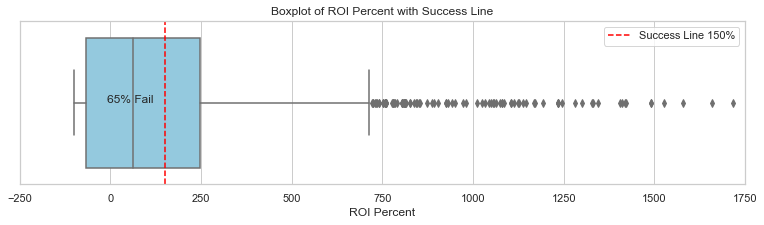

In [111]:
#Insert graph of all movies roi with red line at 2.5xPB or 150% roi

sns.set(style="whitegrid") 
fig, ax1 = plt.subplots(figsize=(13,3),)

boxplot = sns.boxplot(ax=ax1, x=df_budg_2to65mil_11yr["roi_percent"],color='skyblue')
#sns.stripplot(ax=ax1, x=df_budg_2to65mil_11yr["roi_percent"],color='skyblue')
ax1.set(xlabel = 'ROI Percent', title='Boxplot of ROI Percent with Success Line')
ax1.axvline(150, ls='--',color='red',label='Success Line 150%')
ax1.set_xlim(xmin=-250,xmax=1750)
ax1.legend(loc='upper right')
ax1.text(x=-10,y=0,s="65% Fail")
plt.show();

__Note:__ How many movies with roi_percent at >=150% ? Only 533 from 1485. Only __35% were successful.  65% fail__.

In [112]:
#lets only analyze the movies with >=150% ROI(533 movies)
df_budg_success_11yrs = df_budg_2to65mil_11yr[df_budg_2to65mil_11yr['roi_percent'] >= 150]

533 successful movies
INSERT graph of top 10

In [113]:
df_budg_success_11yrs.head(10)


,level_0,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
0,7,52,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2
1,8,54,50,"Jan 20, 2017",Split,5000000.0,138141585.0,278964806.0,273964806.0,5479.3,55.8
2,10,60,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1
3,13,65,18,"May 25, 2012",Les Intouchables,10800000.0,13182281.0,484873045.0,474073045.0,4389.6,44.9
4,15,69,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4
5,17,74,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5
6,29,96,53,"Sep 13, 2013",Insidious Chapter 2,5000000.0,83586447.0,161921515.0,156921515.0,3138.4,32.4
7,31,98,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0
8,35,104,67,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4
9,37,107,55,"Jul 22, 2016",Lights Out,5000000.0,67268835.0,148806510.0,143806510.0,2876.1,29.8


In [114]:
df_budg_success_11yrs = df_budg_success_11yrs.drop(columns=['level_0','index'])


In [115]:
df_budg_success_11yrs.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
count,533.000000,5.330000e+02,5.330000e+02,5.330000e+02,5.330000e+02,533.000000,533.000000
mean,55.587242,2.263056e+07,5.674026e+07,1.231468e+08,1.005162e+08,586.596998,6.863227
std,29.401908,1.712939e+07,4.938324e+07,1.112654e+08,1.014964e+08,678.787104,6.790683
min,1.000000,2.000000e+06,0.000000e+00,5.941994e+06,3.941994e+06,150.000000,2.500000
25%,33.000000,8.500000e+06,2.150269e+07,4.701145e+07,3.678539e+07,227.800000,3.300000
50%,59.000000,1.800000e+07,4.629074e+07,9.405095e+07,7.049704e+07,364.000000,4.600000
75%,82.000000,3.500000e+07,7.546858e+07,1.625028e+08,1.292782e+08,679.200000,7.800000
max,100.000000,6.500000e+07,3.630707e+08,8.949853e+08,8.399853e+08,5817.100000,59.200000


In [116]:
#save successful movies to file
df_budg_success_11yrs.to_csv(path_or_buf = path + 'budg_success_11yrs')

__Conclusion:__ The Percent RoI for movies in the medium budget range from 2 - 65 M USD has a mean of 586% return but median is 61.5%. The mean is skewed due to the number of outliers.  Most movies do not succeed.  In this data, __65%__ do not succeed.  Considering marketing and distribution, A successful movie should return at least 2.5 times the production budget, ie 150% Roi.  Going forward we will only look at those movies. 

### Question: What level of production budget will we be comfortable investing?

Of the 533 Successful Films in medium budget range since 2010, lets look into the production budgets of those.


In [117]:
df_budg_success_11yrs.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
count,533.000000,5.330000e+02,5.330000e+02,5.330000e+02,5.330000e+02,533.000000,533.000000
mean,55.587242,2.263056e+07,5.674026e+07,1.231468e+08,1.005162e+08,586.596998,6.863227
std,29.401908,1.712939e+07,4.938324e+07,1.112654e+08,1.014964e+08,678.787104,6.790683
min,1.000000,2.000000e+06,0.000000e+00,5.941994e+06,3.941994e+06,150.000000,2.500000
25%,33.000000,8.500000e+06,2.150269e+07,4.701145e+07,3.678539e+07,227.800000,3.300000
50%,59.000000,1.800000e+07,4.629074e+07,9.405095e+07,7.049704e+07,364.000000,4.600000
75%,82.000000,3.500000e+07,7.546858e+07,1.625028e+08,1.292782e+08,679.200000,7.800000
max,100.000000,6.500000e+07,3.630707e+08,8.949853e+08,8.399853e+08,5817.100000,59.200000


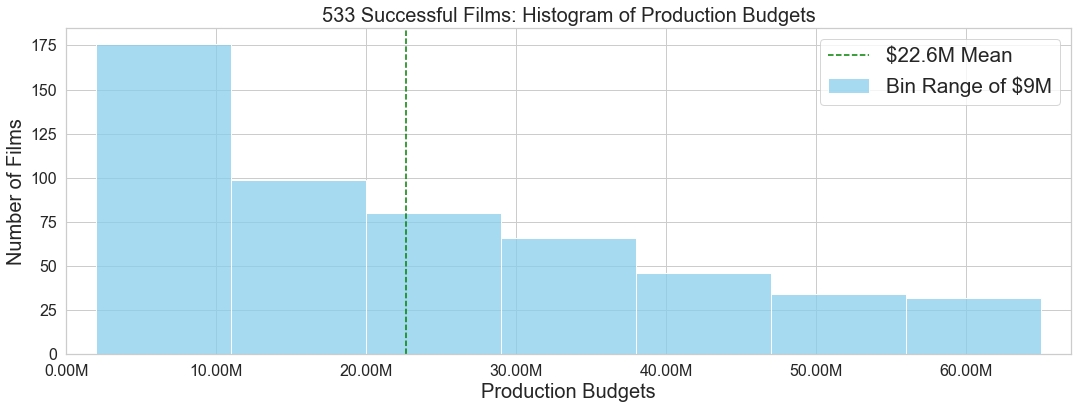

In [243]:
#Histogram of Production budget bins

sns.set(style="whitegrid") 
fig, ax1 = plt.subplots(figsize=(18,6),sharex=True ,sharey=True)

histplot = sns.histplot(ax=ax1, x=df_budg_success_11yrs["production_budget"],
                        color='skyblue',bins=7,label='Bin Range of $9M')

ax1.set_xlabel('Production Budgets', fontsize=20)
ax1.set_ylabel('Number of Films', fontsize=20)
ax1.set_title('533 Successful Films: Histogram of Production Budgets',fontsize=20)
#Set the Average Line
ax1.axvline(df_budg_success_11yrs["production_budget"].mean(), ls='--',
            color='green',label='$22.6M Mean')
ax1.set(xlim = (0,67000000))
# fixing xticks warning with matplotlib.ticker "FixedLocator"
ticks_loc = ax1.get_xticks().tolist()
ax1.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))

fontd = dict(alpha=1, size=16)
ax1.set_xticklabels(['{:,.2f}'.format(x/1000000) + 'M' for x in ticks_loc],fontdict=fontd)

ticks_loc2 = ax1.get_yticks().tolist()
ax1.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc2))

ax1.set_yticklabels(['{:,.0f}'.format(y/1) + '' for y in ticks_loc2],fontdict=fontd)
ax1.set(xlim = (0,67000000))
ax1.legend(loc='upper right', fontsize = 'xx-large')

fig.savefig('./images/ProdBudg.png', bbox_inches='tight')


plt.show();

__Conclusion:__ Most of the movies are in the 2M to 11M and 11M to 20M bin ranges with a steady decline as budgets increase.  We do not need to spend a high amount on budget to make a successful film.
    We need to look at _genres_ of the movies to determine more.  Looking at the Average ROI per range would also be informative.

***
***
***

### Question: What types of feature film genres should we make?
Lets pull in genre information for the movies.  This has been noted in the df_imdbbasics.  We will join this with out budget data.




In [119]:
df_imdbbasics.head(3)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [120]:
df_budg_success_11yrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 532
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 533 non-null    int64  
 1   release_date       533 non-null    object 
 2   movie              533 non-null    object 
 3   production_budget  533 non-null    float64
 4   domestic_gross     533 non-null    float64
 5   worldwide_gross    533 non-null    float64
 6   profit_over_pb     533 non-null    float64
 7   roi_percent        533 non-null    float64
 8   x_times_invest     533 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.6+ KB


In [121]:
#We will do a left join on the successful movies and the imdb basics 
#keying on movie name and year of release
df_budget_genres = pd.merge(df_budg_success_11yrs, df_imdbbasics, 
                            left_on=  ['movie',
                                       pd.to_datetime(df_budg_success_11yrs['release_date']).dt.year],
                            right_on= ['primary_title','start_year'], 
                            how = 'left')

In [122]:
df_budget_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 543
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 544 non-null    int64  
 1   release_date       544 non-null    object 
 2   movie              544 non-null    object 
 3   production_budget  544 non-null    float64
 4   domestic_gross     544 non-null    float64
 5   worldwide_gross    544 non-null    float64
 6   profit_over_pb     544 non-null    float64
 7   roi_percent        544 non-null    float64
 8   x_times_invest     544 non-null    float64
 9   primary_title      429 non-null    object 
 10  original_title     429 non-null    object 
 11  start_year         544 non-null    int64  
 12  runtime_minutes    429 non-null    float64
 13  genres             429 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 63.8+ KB


In [123]:
#We have to exclude where the genres were unknown or Nan
df_budget_genres = df_budget_genres[df_budget_genres.genres != 'unknown']

In [124]:
df_budget_genres = df_budget_genres[df_budget_genres.primary_title.notna()]

In [125]:
#We have matching genre info for 428 successful movies
df_budget_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 543
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 428 non-null    int64  
 1   release_date       428 non-null    object 
 2   movie              428 non-null    object 
 3   production_budget  428 non-null    float64
 4   domestic_gross     428 non-null    float64
 5   worldwide_gross    428 non-null    float64
 6   profit_over_pb     428 non-null    float64
 7   roi_percent        428 non-null    float64
 8   x_times_invest     428 non-null    float64
 9   primary_title      428 non-null    object 
 10  original_title     428 non-null    object 
 11  start_year         428 non-null    int64  
 12  runtime_minutes    428 non-null    float64
 13  genres             428 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 50.2+ KB


In [126]:
#Onlyrun this code once or the genre lis will be in a list itself
#genres is a list of upto 3 genres, splitting it to get the individual genres
df_budget_genres['genres'] = df_budget_genres['genres'].astype(str).apply(lambda x: x.split(",") if x else x)
df_budget_genres.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,original_title,start_year,runtime_minutes,genres
530,1,"Feb 18, 2011","Big Mommas: Like Father, Like Son",32000000.0,37915414.0,82332450.0,50332450.0,157.3,2.6,"Big Mommas: Like Father, Like Son","Big Mommas: Like Father, Like Son",2011,107.0,"[Action, Comedy, Crime]"
532,66,"Dec 19, 2012",Zero Dark Thirty,52500000.0,95720716.0,134612435.0,82112435.0,156.4,2.6,Zero Dark Thirty,Zero Dark Thirty,2012,157.0,"[Drama, Thriller]"
535,62,"Jan 12, 2018",The Commuter,40000000.0,36343858.0,101985431.0,61985431.0,155.0,2.5,The Commuter,The Commuter,2018,105.0,"[Action, Mystery, Thriller]"
536,77,"Sep 21, 2012",The Perks of Being a Wallflower,13000000.0,17742948.0,33069303.0,20069303.0,154.4,2.5,The Perks of Being a Wallflower,The Perks of Being a Wallflower,2012,103.0,[Drama]
537,6,"Oct 24, 2014",John Wick,30000000.0,43037835.0,76235001.0,46235001.0,154.1,2.5,John Wick,John Wick,2014,101.0,"[Action, Crime, Thriller]"
539,81,"Mar 4, 2011",The Adjustment Bureau,50200000.0,62495645.0,126931325.0,76731325.0,152.9,2.5,The Adjustment Bureau,The Adjustment Bureau,2011,106.0,"[Romance, Sci-Fi, Thriller]"
540,58,"Mar 18, 2011",Paul,40000000.0,37412945.0,101162106.0,61162106.0,152.9,2.5,Paul,Paul,2011,104.0,"[Adventure, Comedy, Sci-Fi]"
541,82,"Dec 25, 2014",Unbroken,65000000.0,115637895.0,163527824.0,98527824.0,151.6,2.5,Unbroken,Unbroken,2014,137.0,"[Biography, Drama, Sport]"
542,8,"Dec 29, 2010",Another Year,8000000.0,3205706.0,20005613.0,12005613.0,150.1,2.5,Another Year,Another Year,2010,129.0,"[Comedy, Drama]"
543,81,"Nov 11, 2016",Almost Christmas,17000000.0,42065185.0,42493506.0,25493506.0,150.0,2.5,Almost Christmas,Almost Christmas,2016,111.0,"[Comedy, Drama]"


In [127]:
df_budget_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 543
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 428 non-null    int64  
 1   release_date       428 non-null    object 
 2   movie              428 non-null    object 
 3   production_budget  428 non-null    float64
 4   domestic_gross     428 non-null    float64
 5   worldwide_gross    428 non-null    float64
 6   profit_over_pb     428 non-null    float64
 7   roi_percent        428 non-null    float64
 8   x_times_invest     428 non-null    float64
 9   primary_title      428 non-null    object 
 10  original_title     428 non-null    object 
 11  start_year         428 non-null    int64  
 12  runtime_minutes    428 non-null    float64
 13  genres             428 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 50.2+ KB


In [128]:
#a set of distinct genres in the df
all_genres = set()
for genres in df_budget_genres['genres']:
    if genres:
        all_genres.update(genres)

In [129]:
#Listing of all distinct genres 
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [130]:
#adding cols with zeros for all the genres we have. Will modify genre to 1 
#if the film is of that genre.
for genre in all_genres:
    df_budget_genres[genre] = np.zeros(shape=df_budget_genres.shape[0])
                                
df_budget_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Musical,Crime,Romance,Music,Sci-Fi,Thriller,Sport,Mystery,Western,Action
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
#setting the genre to be 1 if the film is of that genre
for index, row in df_budget_genres.iterrows():
    if row['genres']:
        for genre in row['genres']:
            df_budget_genres.loc[index, genre] = 1

df_budget_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Musical,Crime,Romance,Music,Sci-Fi,Thriller,Sport,Mystery,Western,Action
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [132]:
len(all_genres)

21

In [133]:
#checking the counts for all different genres
#all_genres
for col in all_genres:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{df_budget_genres[col].value_counts()}')

Viewing values in col: Animation
Top 5 values:
0.0    418
1.0     10
Name: Animation, dtype: int64
Viewing values in col: Biography
Top 5 values:
0.0    376
1.0     52
Name: Biography, dtype: int64
Viewing values in col: Adventure
Top 5 values:
0.0    384
1.0     44
Name: Adventure, dtype: int64
Viewing values in col: Drama
Top 5 values:
1.0    228
0.0    200
Name: Drama, dtype: int64
Viewing values in col: War
Top 5 values:
0.0    426
1.0      2
Name: War, dtype: int64
Viewing values in col: Documentary
Top 5 values:
0.0    416
1.0     12
Name: Documentary, dtype: int64
Viewing values in col: Family
Top 5 values:
0.0    412
1.0     16
Name: Family, dtype: int64
Viewing values in col: History
Top 5 values:
0.0    415
1.0     13
Name: History, dtype: int64
Viewing values in col: Horror
Top 5 values:
0.0    349
1.0     79
Name: Horror, dtype: int64
Viewing values in col: Fantasy
Top 5 values:
0.0    409
1.0     19
Name: Fantasy, dtype: int64
Viewing values in col: Comedy
Top 5 values:
0.

In [134]:
#making a list of all genres
cols = list(df_budget_genres.columns)
genre_cols = cols[14:]

#getting a dict with genre counts
genre_count = {}
for col in genre_cols:
    count = np.sum(df_budget_genres[col] == 1).sum() 
    genre_count[col] = count

In [135]:
genre_count

{'Animation': 10,
 'Biography': 52,
 'Adventure': 44,
 'Drama': 228,
 'War': 2,
 'Documentary': 12,
 'Family': 16,
 'History': 13,
 'Horror': 79,
 'Fantasy': 19,
 'Comedy': 164,
 'Musical': 1,
 'Crime': 62,
 'Romance': 71,
 'Music': 22,
 'Sci-Fi': 26,
 'Thriller': 96,
 'Sport': 10,
 'Mystery': 56,
 'Western': 1,
 'Action': 76}

In [136]:
keys = list(genre_count.keys())
values = list(genre_count.values())

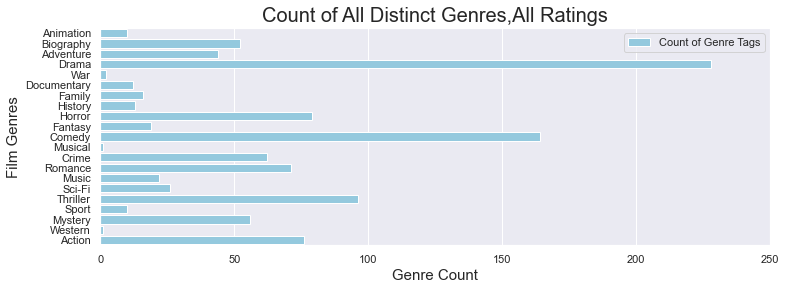

In [137]:
#Histogram of Genres Counts

sns.set(style="darkgrid") 
fig, ax1 = plt.subplots(figsize=(12,4),sharex=True ,sharey=True)

histplot = sns.barplot(y = keys, x = values, color = 'skyblue',
                       label='Count of Genre Tags')

ax1.set_xlabel('Genre Count', fontsize=15)
ax1.set_ylabel('Film Genres', fontsize=15)
ax1.set_title('Count of All Distinct Genres,All Ratings',fontsize=20)
#Set the Average Line

ax1.set(xlim = (0,250))

ax1.legend(loc='upper right')
plt.show();


The 6 most popular genres are Drama, Comedy, Thriller, Horror, Action and Romance.

Grouping by genres to look at sum, mean and max related to worldwide gross 
and roi_percent.

In [138]:
#Total Gross by Genre
ww_gross = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).sum()
    ww_gross[genre] = grouped.iloc[1]['worldwide_gross']

In [139]:
#Average Gross by Genre
ww_gross_avg = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).mean()
    ww_gross_avg[genre] = grouped.iloc[1]['worldwide_gross']

In [140]:
#Max Roi% by Genre
max_roi_genre = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).max()
    max_roi_genre[genre] = grouped.iloc[1]['roi_percent']

In [141]:
#Average Roi% by Genre
avg_roi_genre = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).mean()
    avg_roi_genre[genre] = grouped.iloc[1]['roi_percent']

In [142]:
#Average Prod Budget by Genre
avg_prod_budget = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).mean()
    avg_prod_budget[genre] = grouped.iloc[1]['production_budget']

In [143]:
#Min Prod Budget by Genre
min_prod_budget = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).min()
    min_prod_budget[genre] = grouped.iloc[1]['production_budget']

In [144]:
ww_gross_avg

{'Animation': 238795442.3,
 'Biography': 147391950.3653846,
 'Adventure': 162563478.88636363,
 'Drama': 116104601.25438596,
 'War': 109060110.0,
 'Documentary': 61298916.916666664,
 'Family': 117984713.4375,
 'History': 152316510.76923078,
 'Horror': 109805546.06329113,
 'Fantasy': 103467528.4736842,
 'Comedy': 123180125.51829268,
 'Musical': 50827466.0,
 'Crime': 122348923.75806452,
 'Romance': 120397643.92957747,
 'Music': 145486606.3181818,
 'Sci-Fi': 149113348.15384614,
 'Thriller': 138370908.53125,
 'Sport': 106054711.0,
 'Mystery': 121582196.875,
 'Western': 252276928.0,
 'Action': 166454629.31578946}

In [145]:
ww_gross

{'Animation': 2387954423.0,
 'Biography': 7664381419.0,
 'Adventure': 7152793071.0,
 'Drama': 26471849086.0,
 'War': 218120220.0,
 'Documentary': 735587003.0,
 'Family': 1887755415.0,
 'History': 1980114640.0,
 'Horror': 8674638139.0,
 'Fantasy': 1965883041.0,
 'Comedy': 20201540585.0,
 'Musical': 50827466.0,
 'Crime': 7585633273.0,
 'Romance': 8548232719.0,
 'Music': 3200705339.0,
 'Sci-Fi': 3876947052.0,
 'Thriller': 13283607219.0,
 'Sport': 1060547110.0,
 'Mystery': 6808603025.0,
 'Western': 252276928.0,
 'Action': 12650551828.0}

In [146]:
max_roi_genre

{'Animation': 710.9,
 'Biography': 3001.6,
 'Adventure': 1281.1,
 'Drama': 3001.6,
 'War': 468.1,
 'Documentary': 2876.1,
 'Family': 1423.0,
 'History': 827.1,
 'Horror': 5817.1,
 'Fantasy': 2296.9,
 'Comedy': 2617.9,
 'Musical': 512.4,
 'Crime': 1234.9,
 'Romance': 2617.9,
 'Music': 2031.8,
 'Sci-Fi': 1867.8,
 'Thriller': 5007.4,
 'Sport': 1075.1,
 'Mystery': 5007.4,
 'Western': 620.8,
 'Action': 3001.6}

In [147]:
avg_roi_genre

{'Animation': 412.9200000000001,
 'Biography': 549.0634615384616,
 'Adventure': 375.74090909090904,
 'Drama': 554.131140350877,
 'War': 384.3,
 'Documentary': 625.5666666666666,
 'Family': 420.64375,
 'History': 436.8076923076923,
 'Horror': 1035.9037974683538,
 'Fantasy': 598.884210526316,
 'Comedy': 458.09085365853673,
 'Musical': 512.4,
 'Crime': 336.148387096774,
 'Romance': 515.9394366197183,
 'Music': 549.4454545454547,
 'Sci-Fi': 603.6384615384616,
 'Thriller': 821.5989583333327,
 'Sport': 361.71,
 'Mystery': 1009.175,
 'Western': 620.8,
 'Action': 441.0249999999998}

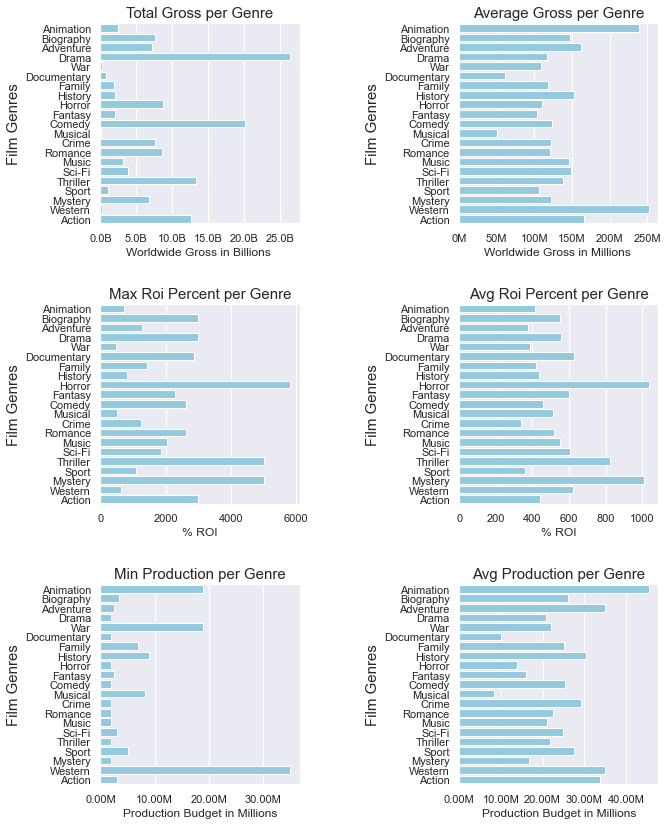

In [148]:
#Genre Grid 
#This graph of subplots could be refactored to a function and could be reused 
sns.set(style="darkgrid") 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(figsize=(10,14),
                                                 nrows=3,ncols=2, )

df_items1 = pd.DataFrame(ww_gross.items())
barplot = sns.barplot(data=df_items1, x=1, y=0,ax=ax1, color = 'skyblue',)
ax1.set(xlabel = 'Worldwide Gross in Billions ',
        ylabel='Genre', title='Total Gross per Genre');
ax1.set_ylabel('Film Genres', fontsize=15)
ax1.set_title('Total Gross per Genre',fontsize=15)
# fixing xticks warning with matplotlib.ticker "FixedLocator"
ticks_loc = ax1.get_xticks().tolist()
ax1.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax1.set_xticklabels(['{:,.1f}'.format(x/1000000000) + 'B' for x in ticks_loc])


df_items2 = pd.DataFrame(ww_gross_avg.items())
ax2 = sns.barplot(data=df_items2, x=1, y=0,ax=ax2,color = 'skyblue')
ax2.set(xlabel = 'Worldwide Gross in Millions ', ylabel='Genre',
        title='Average Gross per Genre');

ax2.set_ylabel('Film Genres', fontsize=15)
ax2.set_title('Average Gross per Genre',fontsize=15)
# fixing xticks warning with matplotlib.ticker "FixedLocator"
ticks_loc = ax2.get_xticks().tolist()
ax2.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax2.set_xticklabels(['{:,.0f}'.format(x/1000000) + 'M' for x in ticks_loc])


df_items3 = pd.DataFrame(max_roi_genre.items())
ax3 = sns.barplot(data=df_items3, x=1, y=0, ax=ax3,color = 'skyblue')
ax3.set(xlabel = '% ROI', ylabel='Film Genre', title='Max Roi Percent per Genre');
ax3.set_ylabel('Film Genres', fontsize=15)
ax3.set_title('Max Roi Percent per Genre',fontsize=15)

df_items4 = pd.DataFrame(avg_roi_genre.items())
ax4 = sns.barplot(data=df_items4, x=1, y=0, ax=ax4, color = 'skyblue')
ax4.set(xlabel = '% ROI', ylabel='Film Genre', title='Avg Roi Percent per Genre');
ax4.set_ylabel('Film Genres', fontsize=15)
ax4.set_title('Avg Roi Percent per Genre',fontsize=15)
# Save just the portion _inside_ the second axis's boundaries
extent = ax4.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

# Pad the saved area by 10% in the x-direction and 20% in the y-direction
fig.savefig('./images/ax4_genre.png', bbox_inches=extent.expanded(1.1, 1.2))


df_items5 = pd.DataFrame(min_prod_budget.items())
ax5 = sns.barplot(data=df_items5, x=1, y=0, ax=ax5, color = 'skyblue')
ax5.set(xlabel = 'Production Budget in Millions', ylabel='Genre', title='Min Production per Genre')
ax5.set_ylabel('Film Genres', fontsize=15)
ax5.set_title('Min Production per Genre',fontsize=15)
# fixing xticks warning with matplotlib.ticker "FixedLocator"
ticks_loc = ax5.get_xticks().tolist()
ax5.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax5.set_xticklabels(['{:,.2f}'.format(x/1000000) + 'M' for x in ticks_loc])


df_items6 = pd.DataFrame(avg_prod_budget.items())
ax6 = sns.barplot(data=df_items6, x=1, y=0, ax=ax6, color = 'skyblue')
ax6.set(xlabel = 'Production Budget in Millions', ylabel='Genre', title='Avg Production per Genre')
ax6.set_ylabel('Film Genres', fontsize=15)
ax6.set_title('Avg Production per Genre',fontsize=15)
# fixing xticks warning with matplotlib.ticker "FixedLocator"
ticks_loc = ax6.get_xticks().tolist()
ax6.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax6.set_xticklabels(['{:,.2f}'.format(x/1000000) + 'M' for x in ticks_loc])

plt.subplots_adjust(wspace=0.8,hspace=.4)
plt.show();


In [149]:
#Observations---Horror Mystery Thriller are top3 Average Return on budget.  Thriller is one of the top 3 in count

In [180]:
sorted(avg_roi_genre.values(),reverse=True)

[1035.9037974683538,
 1009.175,
 821.5989583333327,
 625.5666666666666,
 620.8,
 603.6384615384616,
 598.884210526316,
 554.131140350877,
 549.4454545454547,
 549.0634615384616,
 515.9394366197183,
 512.4,
 458.09085365853673,
 441.0249999999998,
 436.8076923076923,
 420.64375,
 412.9200000000001,
 384.3,
 375.74090909090904,
 361.71,
 336.148387096774]

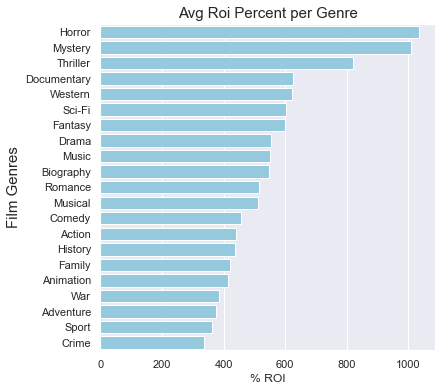

In [187]:
#This graph of subplots could be refactored to a function and could be reused 
sns.set(style="darkgrid") 
fig, ax4 = plt.subplots(figsize=(6,6),
                                                 nrows=1,ncols=1, )
df_items4 = pd.DataFrame(avg_roi_genre.items())
df_items4.sort_values(by=1, inplace=True, ascending=False)
ax4 = sns.barplot(data=df_items4, x=1, y=0, ax=ax4, color = 'skyblue')
ax4.set(xlabel = '% ROI', ylabel='Film Genre', title='Avg Roi Percent per Genre');
ax4.set_ylabel('Film Genres', fontsize=15)
ax4.set_title('Avg Roi Percent per Genre',fontsize=15)
# Save just the portion _inside_ the second axis's boundaries
extent = ax4.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

# Pad the saved area by 10% in the x-direction and 20% in the y-direction
#fig.savefig('./images/ax4_genre.png', bbox_inches=extent.expanded(1.1, 1.2))


__Conclusion:__ Higher returns are with the Horror, Mystery, and Thriller genres.

#### How does MPAA Rating correlate?

In [151]:
#Lets Add in Movie MPAA Rating and exclude R to protect our parent name brand
#MPAA Rating is in the 
df_budget_genres

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Musical,Crime,Romance,Music,Sci-Fi,Thriller,Sport,Mystery,Western,Action
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,81,"Mar 4, 2011",The Adjustment Bureau,50200000.0,62495645.0,126931325.0,76731325.0,152.9,2.5,The Adjustment Bureau,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
540,58,"Mar 18, 2011",Paul,40000000.0,37412945.0,101162106.0,61162106.0,152.9,2.5,Paul,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
541,82,"Dec 25, 2014",Unbroken,65000000.0,115637895.0,163527824.0,98527824.0,151.6,2.5,Unbroken,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
542,8,"Dec 29, 2010",Another Year,8000000.0,3205706.0,20005613.0,12005613.0,150.1,2.5,Another Year,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
df_mpaa_ratings = pd.read_csv('./data/tn_mpaa_ratings.csv',index_col = 0, encoding='utf8')

In [153]:
df_mpaa_ratings.head(10)

,Released,Title,ProductionBudget,WorldwideBox Office,mpaa_rating
0,"Feb 11, 2011",Gnomeo and Juliet,"$36,000,000","$193,737,977",G
1,"Feb 11, 2011",Justin Bieber: Never Say Never,"$13,000,000","$99,034,125",G
2,"Jul 15, 2011",Winnie the Pooh,"$30,000,000","$50,145,607",G
3,"Jul 23, 2010",Ramona and Beezus,"$15,000,000","$27,469,621",G
4,"Feb 17, 2012",Kari gurashi no Arietti,"$23,000,000","$151,496,097",G
5,"Dec 13, 2011",George Balanchine's The Nutcracker,"$19,000,000","$2,119,994",G
6,"Oct 21, 2011",The Mighty Macs,"$7,000,000","$1,891,936",G
7,"Aug 29, 2012",The Oogieloves in the BIG Balloon Adv…,"$20,000,000","$1,065,907",G
8,"Oct 4, 2011",La vÃ©ritable histoire du Chat BottÃ©,"$25,000,000","$8,208,594",G
9,"Dec 31, 2012",Zambezia,"$20,000,000","$34,454,336",G


In [154]:
#We will do a left join on the successful movies and the imdb basics 
#keying on movie name and year of release
df_budget_genre_ratings = pd.merge(df_budget_genres, df_mpaa_ratings, 
                            left_on=  ['movie',
                                       pd.to_datetime(df_budget_genres['release_date']).dt.year],
                            right_on= ['Title',
                                       pd.to_datetime(df_mpaa_ratings['Released']).dt.year], 
                            how = 'left')

In [155]:
df_budget_genre_ratings = df_budget_genre_ratings[df_budget_genre_ratings['mpaa_rating'].notna()]

In [156]:
df_budget_genre_ratings.head()

,id,key_1,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,...,Thriller,Sport,Mystery,Western,Action,Released,Title,ProductionBudget,WorldwideBox Office,mpaa_rating
0,65,2010,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,...,0.0,0.0,0.0,0.0,0.0,"Oct 20, 2010",Paranormal Activity 2,"$3,000,000","$177,512,032",R
1,49,2017,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,...,1.0,0.0,1.0,0.0,0.0,"Feb 24, 2017",Get Out,"$5,000,000","$252,500,135",R
2,51,2011,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,...,1.0,0.0,1.0,0.0,0.0,"Oct 21, 2011",Paranormal Activity 3,"$5,000,000","$207,039,844",R
5,67,2013,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4,...,1.0,0.0,0.0,0.0,0.0,"Jun 7, 2013",The Purge,"$3,000,000","$91,266,581",R
6,67,2013,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4,...,1.0,0.0,0.0,0.0,0.0,"Jun 7, 2013",The Purge,"$3,000,000","$91,266,581",R


In [157]:
df_budget_genre_ratings.drop(columns=['id', 'key_1','primary_title',
                                      'original_title','Released',
                                      'ProductionBudget',
                                      'WorldwideBox Office','runtime_minutes'],
                             inplace=True)

In [158]:
df_budget_genre_ratings.reset_index(inplace=True)

In [159]:
df_budget_genre_ratings

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,start_year,...,Romance,Music,Sci-Fi,Thriller,Sport,Mystery,Western,Action,Title,mpaa_rating
0,0,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paranormal Activity 2,R
1,1,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,2017,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Get Out,R
2,2,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,2011,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Paranormal Activity 3,R
3,5,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4,2013,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,The Purge,R
4,6,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4,2013,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,The Purge,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,451,"Mar 4, 2011",The Adjustment Bureau,50200000.0,62495645.0,126931325.0,76731325.0,152.9,2.5,2011,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,The Adjustment Bureau,PG-13
400,452,"Mar 18, 2011",Paul,40000000.0,37412945.0,101162106.0,61162106.0,152.9,2.5,2011,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Paul,R
401,453,"Dec 25, 2014",Unbroken,65000000.0,115637895.0,163527824.0,98527824.0,151.6,2.5,2014,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Unbroken,PG-13
402,454,"Dec 29, 2010",Another Year,8000000.0,3205706.0,20005613.0,12005613.0,150.1,2.5,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Another Year,PG-13


In [160]:
df_budget_genre_ratings.drop(columns=['index'], inplace=True)

In [161]:
df_budget_genre_ratings.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,start_year,genres,...,Romance,Music,Sci-Fi,Thriller,Sport,Mystery,Western,Action,Title,mpaa_rating
0,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,2010,[Horror],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paranormal Activity 2,R
1,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,2017,"[Horror, Mystery, Thriller]",...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Get Out,R
2,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,2011,"[Horror, Mystery, Thriller]",...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Paranormal Activity 3,R
3,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4,2013,"[Horror, Thriller]",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,The Purge,R
4,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4,2013,"[Horror, Thriller]",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,The Purge,R


In [162]:
df_budget_genre_ratings.mpaa_rating.value_counts()

R        193
PG-13    173
PG        37
G          1
Name: mpaa_rating, dtype: int64

In [163]:
ratings = ['R','PG-13','PG','G']

In [164]:
ratingsvalues = list(df_budget_genre_ratings.mpaa_rating.value_counts())

In [165]:
ratingsvalues

[193, 173, 37, 1]

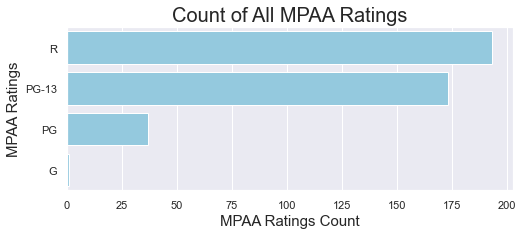

In [166]:
#Histogram of Production budget bins

sns.set(style="darkgrid") 
fig, ax1 = plt.subplots(figsize=(8,3))

histplot = sns.barplot(y = ratings, x = ratingsvalues, color = 'skyblue',
                       label='Count of MPAA Rating')

ax1.set_xlabel('MPAA Ratings Count', fontsize=15)
ax1.set_ylabel('MPAA Ratings', fontsize=15)
ax1.set_title('Count of All MPAA Ratings',fontsize=20)
#Set the Average Line

#ax1.set(xlim = (0,250))

#ax1.legend(loc='upper right')
plt.show();

In [167]:
df_budget_genre_ratings

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,start_year,genres,...,Romance,Music,Sci-Fi,Thriller,Sport,Mystery,Western,Action,Title,mpaa_rating
0,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,2010,[Horror],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paranormal Activity 2,R
1,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,2017,"[Horror, Mystery, Thriller]",...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Get Out,R
2,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,2011,"[Horror, Mystery, Thriller]",...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Paranormal Activity 3,R
3,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4,2013,"[Horror, Thriller]",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,The Purge,R
4,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4,2013,"[Horror, Thriller]",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,The Purge,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,"Mar 4, 2011",The Adjustment Bureau,50200000.0,62495645.0,126931325.0,76731325.0,152.9,2.5,2011,"[Romance, Sci-Fi, Thriller]",...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,The Adjustment Bureau,PG-13
400,"Mar 18, 2011",Paul,40000000.0,37412945.0,101162106.0,61162106.0,152.9,2.5,2011,"[Adventure, Comedy, Sci-Fi]",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Paul,R
401,"Dec 25, 2014",Unbroken,65000000.0,115637895.0,163527824.0,98527824.0,151.6,2.5,2014,"[Biography, Drama, Sport]",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Unbroken,PG-13
402,"Dec 29, 2010",Another Year,8000000.0,3205706.0,20005613.0,12005613.0,150.1,2.5,2010,"[Comedy, Drama]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Another Year,PG-13


In [206]:

    grouped = df_budget_genre_ratings.groupby(by ='mpaa_rating').mean()


In [207]:
    avg_roi_by_rating[ratings] = grouped.iloc[1]['roi_percent']

NameError: name 'avg_roi_by_rating' is not defined

In [ ]:
avg_roi_by_rating

In [193]:
df_not_R = df_budget_genre_ratings[df_budget_genre_ratings['mpaa_rating'] != 'R']

In [195]:
df_not_R

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,start_year,genres,...,Romance,Music,Sci-Fi,Thriller,Sport,Mystery,Western,Action,Title,mpaa_rating
5,"Jul 22, 2016",Lights Out,5000000.0,67268835.0,148806510.0,143806510.0,2876.1,29.8,2016,"[Drama, Horror, Mystery]",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Lights Out,PG-13
6,"Jul 22, 2016",Lights Out,5000000.0,67268835.0,148806510.0,143806510.0,2876.1,29.8,2016,[Documentary],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lights Out,PG-13
9,"Apr 13, 2018",Truth or Dare,3500000.0,41411015.0,95127344.0,91627344.0,2617.9,27.2,2018,"[Horror, Thriller]",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Truth or Dare,PG-13
10,"Apr 13, 2018",Truth or Dare,3500000.0,41411015.0,95127344.0,91627344.0,2617.9,27.2,2018,"[Comedy, Drama, Romance]",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Truth or Dare,PG-13
11,"Jun 6, 2014",The Fault in Our Stars,12000000.0,124872350.0,307166834.0,295166834.0,2459.7,25.6,2014,"[Drama, Romance]",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Fault in Our Stars,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,"Sep 21, 2012",The Perks of Being a Wallflower,13000000.0,17742948.0,33069303.0,20069303.0,154.4,2.5,2012,[Drama],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Perks of Being a Wallflower,PG-13
399,"Mar 4, 2011",The Adjustment Bureau,50200000.0,62495645.0,126931325.0,76731325.0,152.9,2.5,2011,"[Romance, Sci-Fi, Thriller]",...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,The Adjustment Bureau,PG-13
401,"Dec 25, 2014",Unbroken,65000000.0,115637895.0,163527824.0,98527824.0,151.6,2.5,2014,"[Biography, Drama, Sport]",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Unbroken,PG-13
402,"Dec 29, 2010",Another Year,8000000.0,3205706.0,20005613.0,12005613.0,150.1,2.5,2010,"[Comedy, Drama]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Another Year,PG-13


In [196]:
#making a list of all columns
colsnotr = list(df_not_R.columns)

In [197]:
colsnotr

['release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'profit_over_pb',
 'roi_percent',
 'x_times_invest',
 'start_year',
 'genres',
 'Animation',
 'Biography',
 'Adventure',
 'Drama',
 'War',
 'Documentary',
 'Family',
 'History',
 'Horror',
 'Fantasy',
 'Comedy',
 'Musical',
 'Crime',
 'Romance',
 'Music',
 'Sci-Fi',
 'Thriller',
 'Sport',
 'Mystery',
 'Western',
 'Action',
 'Title',
 'mpaa_rating']

In [198]:
genre_colsnotr = cols[14:36]

In [199]:
df_not_R

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,start_year,genres,...,Romance,Music,Sci-Fi,Thriller,Sport,Mystery,Western,Action,Title,mpaa_rating
5,"Jul 22, 2016",Lights Out,5000000.0,67268835.0,148806510.0,143806510.0,2876.1,29.8,2016,"[Drama, Horror, Mystery]",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Lights Out,PG-13
6,"Jul 22, 2016",Lights Out,5000000.0,67268835.0,148806510.0,143806510.0,2876.1,29.8,2016,[Documentary],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lights Out,PG-13
9,"Apr 13, 2018",Truth or Dare,3500000.0,41411015.0,95127344.0,91627344.0,2617.9,27.2,2018,"[Horror, Thriller]",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Truth or Dare,PG-13
10,"Apr 13, 2018",Truth or Dare,3500000.0,41411015.0,95127344.0,91627344.0,2617.9,27.2,2018,"[Comedy, Drama, Romance]",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Truth or Dare,PG-13
11,"Jun 6, 2014",The Fault in Our Stars,12000000.0,124872350.0,307166834.0,295166834.0,2459.7,25.6,2014,"[Drama, Romance]",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Fault in Our Stars,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,"Sep 21, 2012",The Perks of Being a Wallflower,13000000.0,17742948.0,33069303.0,20069303.0,154.4,2.5,2012,[Drama],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Perks of Being a Wallflower,PG-13
399,"Mar 4, 2011",The Adjustment Bureau,50200000.0,62495645.0,126931325.0,76731325.0,152.9,2.5,2011,"[Romance, Sci-Fi, Thriller]",...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,The Adjustment Bureau,PG-13
401,"Dec 25, 2014",Unbroken,65000000.0,115637895.0,163527824.0,98527824.0,151.6,2.5,2014,"[Biography, Drama, Sport]",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Unbroken,PG-13
402,"Dec 29, 2010",Another Year,8000000.0,3205706.0,20005613.0,12005613.0,150.1,2.5,2010,"[Comedy, Drama]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Another Year,PG-13


In [200]:

genre_colsnotr = cols[14:36]

#getting a dict with genre counts
genre_countnotr = {}
for col in genre_cols:
    count = np.sum(df_not_R[col] == 1).sum() 
    genre_countnotr[col] = count

In [201]:
genre_countnotr

{'Animation': 9,
 'Biography': 28,
 'Adventure': 25,
 'Drama': 125,
 'War': 2,
 'Documentary': 6,
 'Family': 14,
 'History': 8,
 'Horror': 32,
 'Fantasy': 8,
 'Comedy': 80,
 'Musical': 0,
 'Crime': 20,
 'Romance': 46,
 'Music': 14,
 'Sci-Fi': 16,
 'Thriller': 38,
 'Sport': 7,
 'Mystery': 28,
 'Western': 1,
 'Action': 30}

In [202]:
keys_notr = list(genre_countnotr.keys())
values_notr = list(genre_countnotr.values())

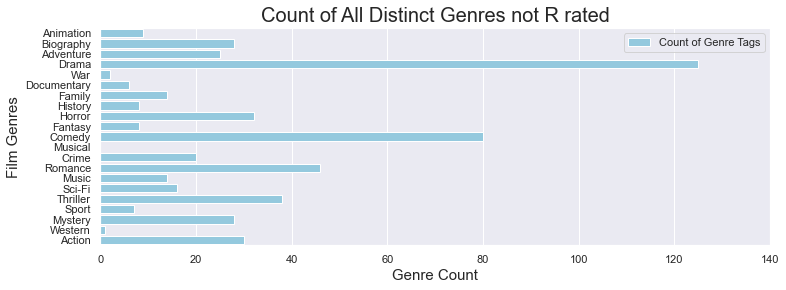

In [215]:
#Histogram of Genres Counts

sns.set(style="darkgrid") 
fig, ax1 = plt.subplots(figsize=(12,4),sharex=True ,sharey=True)

histplot = sns.barplot(y = keys_notr, x = values_notr, color = 'skyblue',
                       label='Count of Genre Tags')

ax1.set_xlabel('Genre Count', fontsize=15)
ax1.set_ylabel('Film Genres', fontsize=15)
ax1.set_title('Count of All Distinct Genres not R rated',fontsize=20)
#Set the Average Line

ax1.set(xlim = (0,140))

ax1.legend(loc='upper right')
plt.show();


In [217]:
all_genresnotr = keys_notr

In [218]:
#Average Roi% by Genre
max_roi_genrenotr= {}
for genre in all_genresnotr:
    grouped = df_not_R.groupby(by =''.join(genre)).max()
    max_roi_genrenotr[genre] = grouped.iloc[0]['roi_percent']

In [219]:
#Average Roi% by Genre
avg_roi_genrenotr= {}
for genre in all_genresnotr:
    grouped = df_not_R.groupby(by =''.join(genre)).mean()
    avg_roi_genrenotr[genre] = grouped.iloc[0]['roi_percent']

In [220]:
#Average Gross by Genre
ww_gross_avgnotr = {}
for genre in all_genresnotr:
    grouped = df_not_R.groupby(by =''.join(genre)).mean()
    ww_gross_avg[genre] = grouped.iloc[0]['worldwide_gross']

In [221]:
#Average PB by Genre
pb_avgnotr = {}
for genre in all_genresnotr:
    grouped = df_not_R.groupby(by =''.join(genre)).mean()
    pb_avgnotr[genre] = grouped.iloc[0]['production_budget']

In [222]:
max_pb_genrenotr = {}
for genre in all_genresnotr:
    grouped = df_not_R.groupby(by =''.join(genre)).max()
    max_pb_genrenotr[genre] = grouped.iloc[0]['production_budget']

In [223]:
max_roi_genrenotr

{'Animation': 2876.1,
 'Biography': 2876.1,
 'Adventure': 2876.1,
 'Drama': 2876.1,
 'War': 2876.1,
 'Documentary': 2876.1,
 'Family': 2876.1,
 'History': 2876.1,
 'Horror': 2876.1,
 'Fantasy': 2876.1,
 'Comedy': 2876.1,
 'Musical': 2876.1,
 'Crime': 2876.1,
 'Romance': 2876.1,
 'Music': 2876.1,
 'Sci-Fi': 2876.1,
 'Thriller': 2876.1,
 'Sport': 2876.1,
 'Mystery': 2876.1,
 'Western': 2876.1,
 'Action': 2876.1}

In [224]:
#a set of distinct genres in the df
all_genresnotr = set()
for genres in df_not_R['genres']:
    if genres:
        all_genresnotr.update(genres)

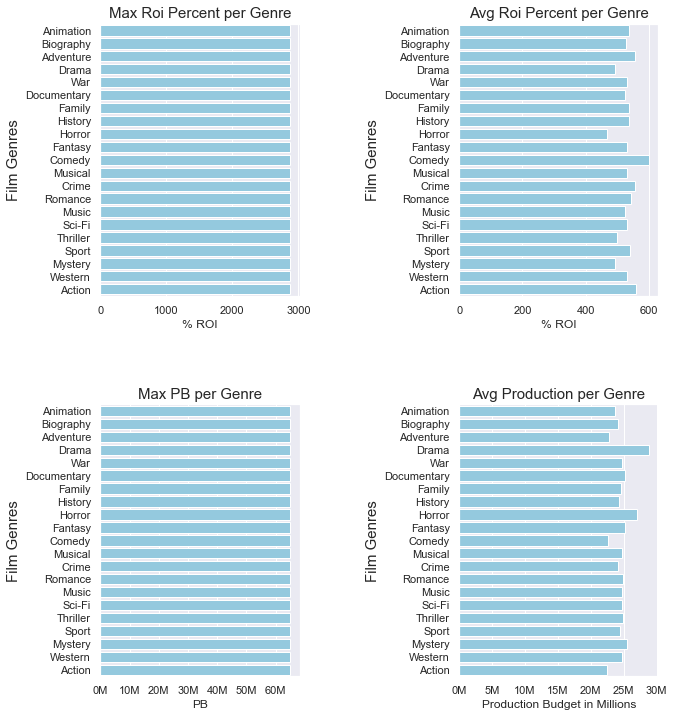

In [225]:
#Genre Grid 
#This graph of subplots could be refactored to a function and could be reused 
sns.set(style="darkgrid") 
fig, ((ax3, ax4), (ax5, ax6)) = plt.subplots(figsize=(10,12),
                                                 nrows=2,ncols=2, )
max_roi_genrenotr
df_items3 = pd.DataFrame(max_roi_genrenotr.items())
ax3 = sns.barplot(data=df_items3, x=1, y=0, ax=ax3, color = 'skyblue')
ax3.set(xlabel = '% ROI', ylabel='Film Genre', title='Max Roi Percent per Genre');
ax3.set_ylabel('Film Genres', fontsize=15)
ax3.set_title('Max Roi Percent per Genre',fontsize=15)



df_items4 = pd.DataFrame(avg_roi_genrenotr.items())
ax4 = sns.barplot(data=df_items4, x=1, y=0, ax=ax4, color = 'skyblue')
ax4.set(xlabel = '% ROI', ylabel='Film Genre', title='Avg Roi Percent per Genre');
ax4.set_ylabel('Film Genres', fontsize=15)
ax4.set_title('Avg Roi Percent per Genre',fontsize=15)

df_items5 = pd.DataFrame(max_pb_genrenotr.items())
ax5 = sns.barplot(data=df_items5, x=1, y=0, ax=ax5, color = 'skyblue')
ax5.set(xlabel = 'PB', ylabel='Film Genre', title='Max PB per Genre');
ax5.set_ylabel('Film Genres', fontsize=15)
ax5.set_title('Max PB per Genre',fontsize=15)
# fixing xticks warning with matplotlib.ticker "FixedLocator"
ticks_loc = ax5.get_xticks().tolist()
ax5.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax5.set_xticklabels(['{:,.0f}'.format(x/1000000) + 'M' for x in ticks_loc])

df_items6 = pd.DataFrame(pb_avgnotr.items())
ax6 = sns.barplot(data=df_items6, x=1, y=0, ax=ax6, color = 'skyblue')
ax6.set(xlabel = 'Production Budget in Millions', ylabel='Genre', title='Avg Production per Genre')
ax6.set_ylabel('Film Genres', fontsize=15)
ax6.set_title('Avg Production per Genre',fontsize=15)
# fixing xticks warning with matplotlib.ticker "FixedLocator"
ticks_loc = ax6.get_xticks().tolist()
ax6.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax6.set_xticklabels(['{:,.0f}'.format(x/1000000) + 'M' for x in ticks_loc])

plt.subplots_adjust(wspace=0.8,hspace=.4)
plt.show();


Text(0.5, 1.0, 'Avg Roi Percent per Genre')

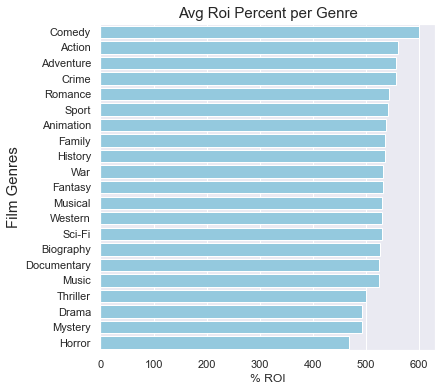

In [230]:
sns.set(style="darkgrid") 
fig, ax4 = plt.subplots(figsize=(6,6),nrows=1,ncols=1, )

df_items4 = pd.DataFrame(avg_roi_genrenotr.items())
df_items4.sort_values(by=1, inplace=True, ascending=False)
ax4 = sns.barplot(data=df_items4, x=1, y=0, ax=ax4, color = 'skyblue')
ax4.set(xlabel = '% ROI', ylabel='Film Genre', title='Avg Roi Percent per Genre');
#ax4.set_xbound(upper=1100)
ax4.set_ylabel('Film Genres', fontsize=15)
ax4.set_title('Avg Roi Percent per Genre',fontsize=15)

__Conclusion:__ Genres higher average returns are with R rating are Horror, Mystery and Thrillers.  Excluding R ratings, Comedy has a higher ROI% closely followed by Adventure, Crime, Action, Sport, Romance.  Anything really except Horror, Drama are worst when not R rated but not by much.

### Question: When should we most optimally release our movies? Are there better months for our releases?

In answering the question When to Release the movie lets look to see when previous movies were released.
Lets make a column for release month.


In [245]:
df_budget_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Musical,Crime,Romance,Music,Sci-Fi,Thriller,Sport,Mystery,Western,Action
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [246]:
df_budget_genres['release_month'] = pd.to_datetime(df_budget_genres.release_date).dt.strftime('%b')
#df_budget_genres['release_month'] = pd.to_datetime(df_budget_genres.release_date).dt.month

In [247]:
df_budget_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Crime,Romance,Music,Sci-Fi,Thriller,Sport,Mystery,Western,Action,release_month
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oct
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Feb
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Oct
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Oct
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Dec


In [248]:
df_budget_genres

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Crime,Romance,Music,Sci-Fi,Thriller,Sport,Mystery,Western,Action,release_month
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oct
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Feb
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Oct
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Oct
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,81,"Mar 4, 2011",The Adjustment Bureau,50200000.0,62495645.0,126931325.0,76731325.0,152.9,2.5,The Adjustment Bureau,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Mar
540,58,"Mar 18, 2011",Paul,40000000.0,37412945.0,101162106.0,61162106.0,152.9,2.5,Paul,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mar
541,82,"Dec 25, 2014",Unbroken,65000000.0,115637895.0,163527824.0,98527824.0,151.6,2.5,Unbroken,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Dec
542,8,"Dec 29, 2010",Another Year,8000000.0,3205706.0,20005613.0,12005613.0,150.1,2.5,Another Year,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dec


In [249]:
pd.to_datetime(df_budget_genres['release_date']).dt.year

0      2010
2      2017
4      2011
5      2014
7      2016
       ... 
539    2011
540    2011
541    2014
542    2010
543    2016
Name: release_date, Length: 428, dtype: int64

In [250]:
df_budget_genres['month'] = pd.to_datetime(df_budget_genres['release_date']).dt.month

In [251]:
df_budget_genres.sort_values(by='month', inplace=True)

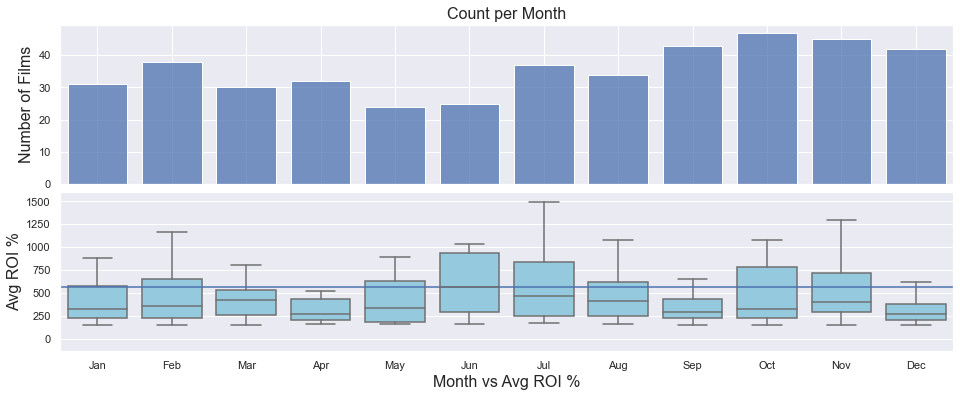

In [272]:
##Histplot of movies release in month
sns.set(style="darkgrid") 
fig, (ax1, ax2) = plt.subplots(figsize=(16,6),nrows =2, ncols=1,sharex=True ,sharey=False)
ax1 = sns.histplot(df_budget_genres, x="release_month",bins=12,shrink=.8, ax=ax1)
ax1.set_xlabel(xlabel = 'Month of Film Release', fontsize = 16)
ax1.set_ylabel(ylabel='Number of Films',fontsize = 16)
ax1.set_title(label='Count per Month',fontsize = 16)

sns.boxplot(x='release_month',y='roi_percent',data=df_budget_genres,ax=ax2,
            color='skyblue' ,fliersize=0)
ax2.set_xlabel(xlabel= 'Month vs Avg ROI %', fontsize = 16)
ax2.set_ylabel(ylabel='Avg ROI %', fontsize = 16)


ax2.set_ylim(top=1600)
ax2.axhline(y=570)

plt.subplots_adjust(wspace=0.8, hspace=0.05)
plt.show();


__Conclusion:__  Some very good high returns on investment occurred in the months of October and December.  The median returns per month are similar and all under the 10 times investment.  There is a down trend with September and May not having huge gains.  October could be closely related with Halloween and Horror and/or Thriler movies.  Safe months are June, July, Aug, Oct Nov.
















***

***

***


### Question: How many feature films should we release per year? ie drives initial investment

#How many movies a year? Lets Look at the successful studios number a year.
df_bom has studio info...We can join on budget genres to get month and year.


In [274]:
df_bom.head()

,studio,domestic_gross,foreign_gross,year,worldwide_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [275]:
df_budget_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 289 to 491
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 428 non-null    int64  
 1   release_date       428 non-null    object 
 2   movie              428 non-null    object 
 3   production_budget  428 non-null    float64
 4   domestic_gross     428 non-null    float64
 5   worldwide_gross    428 non-null    float64
 6   profit_over_pb     428 non-null    float64
 7   roi_percent        428 non-null    float64
 8   x_times_invest     428 non-null    float64
 9   primary_title      428 non-null    object 
 10  original_title     428 non-null    object 
 11  start_year         428 non-null    int64  
 12  runtime_minutes    428 non-null    float64
 13  genres             428 non-null    object 
 14  Animation          428 non-null    float64
 15  Biography          428 non-null    float64
 16  Adventure          428 n

In [276]:
df_studios_bud_genres = pd.merge(df_budget_genres, df_bom, 
                            left_on=  ['movie',pd.to_datetime(df_budget_genres['release_date']).dt.year],
                            right_on= ['title','year'], 
                            how = 'left')

In [277]:
df_studios_bud_genres[df_studios_bud_genres.studio.isna()]

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross_x,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Mystery,Western,Action,release_month,month,studio,domestic_gross_y,foreign_gross,year,worldwide_gross_y
0,27,"Jan 25, 2013",Hansel & Gretel: Witch Hunters,50000000.0,55703475.0,214949716.0,164949716.0,329.9,4.3,Hansel & Gretel: Witch Hunters,...,0.0,0.0,1.0,Jan,1,NaN,NaN,NaN,2013,NaN
7,100,"Jan 18, 2019",Glass,20000000.0,111035005.0,245303505.0,225303505.0,1126.5,12.3,Glass,...,0.0,0.0,0.0,Jan,1,NaN,NaN,NaN,2019,NaN
9,37,"Jan 22, 2010",Legion,26000000.0,40168080.0,67647574.0,41647574.0,160.2,2.6,Legion,...,0.0,0.0,1.0,Jan,1,NaN,NaN,NaN,2010,NaN
19,68,"Jan 22, 2016",The Boy,10000000.0,35819556.0,68220952.0,58220952.0,582.2,6.8,The Boy,...,1.0,0.0,0.0,Jan,1,NaN,NaN,NaN,2016,NaN
23,1,"Jan 23, 2015",Mommy,4900000.0,3498695.0,17536004.0,12636004.0,257.9,3.6,Mommy,...,0.0,0.0,0.0,Jan,1,NaN,NaN,NaN,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,95,"Nov 10, 2017",Murder on the Orient Express,55000000.0,102826543.0,345922730.0,290922730.0,529.0,6.3,Murder on the Orient Express,...,1.0,0.0,0.0,Nov,11,NaN,NaN,NaN,2017,NaN
402,95,"Dec 31, 2015",Sardaar Ji,2700000.0,0.0,8200000.0,5500000.0,203.7,3.0,Sardaar Ji,...,0.0,0.0,0.0,Dec,12,NaN,NaN,NaN,2015,NaN
404,33,"Dec 3, 2014",Wild,15000000.0,37880356.0,52460543.0,37460543.0,249.7,3.5,Wild,...,0.0,0.0,0.0,Dec,12,NaN,NaN,NaN,2014,NaN
409,50,"Dec 31, 2017",Posledniy bogatyr,8500000.0,0.0,30700192.0,22200192.0,261.2,3.6,Posledniy bogatyr,...,0.0,0.0,1.0,Dec,12,NaN,NaN,NaN,2017,NaN


In [278]:
df_bom[df_bom.index== 'Get Out']

,studio,domestic_gross,foreign_gross,year,worldwide_gross
title,,,,,
Get Out,Uni.,176000000.0,79400000.0,2017,255400000.0


In [279]:
df_studios_bud_genres = df_studios_bud_genres[df_studios_bud_genres.studio.notna()]

In [280]:
#a set of distinct genres in the df
all_studios = set(df_studios_bud_genres['studio'])

In [281]:
all_studios

{'3D',
 'A24',
 'Affirm',
 'BG',
 'BH Tilt',
 'BV',
 'CBS',
 'EC',
 'Eros',
 'Focus',
 'Fox',
 'FoxS',
 'GrtIndia',
 'IFC',
 'LG/S',
 'LGF',
 'LGP',
 'MGM',
 'Mira.',
 'Neon',
 'ORF',
 'Orch.',
 'Over.',
 'PFR',
 'Par.',
 'RAtt.',
 'RTWC',
 'Rela.',
 'SGem',
 'SPC',
 'STX',
 'Sony',
 'Sum.',
 'TriS',
 'UTV',
 'Uni.',
 'W/Dim.',
 'WB',
 'WB (NL)',
 'Wein.',
 'Yash'}

In [282]:
#getting a dict with Studio counts
studio_count = {}
for col in genre_cols:
    count = np.sum(df_budget_genres[col] == 1).sum() 
    genre_count[col] = count

In [283]:
df_studios_bud_genres['studio'].value_counts()

Uni.        56
Fox         29
Par.        25
Sony        25
WB          21
WB (NL)     20
LGF         18
Wein.       18
FoxS        15
SGem        14
Focus       14
BV          11
LG/S        11
ORF         10
TriS        10
SPC          9
Rela.        8
STX          7
A24          6
CBS          5
Sum.         4
RAtt.        4
Eros         3
BH Tilt      3
W/Dim.       3
Affirm       2
IFC          2
BG           1
3D           1
RTWC         1
Mira.        1
UTV          1
Orch.        1
MGM          1
LGP          1
Yash         1
EC           1
Neon         1
PFR          1
GrtIndia     1
Over.        1
Name: studio, dtype: int64

In [284]:
studio_count = dict(df_studios_bud_genres['studio'].value_counts())

In [285]:
studio_count

{'Uni.': 56,
 'Fox': 29,
 'Par.': 25,
 'Sony': 25,
 'WB': 21,
 'WB (NL)': 20,
 'LGF': 18,
 'Wein.': 18,
 'FoxS': 15,
 'SGem': 14,
 'Focus': 14,
 'BV': 11,
 'LG/S': 11,
 'ORF': 10,
 'TriS': 10,
 'SPC': 9,
 'Rela.': 8,
 'STX': 7,
 'A24': 6,
 'CBS': 5,
 'Sum.': 4,
 'RAtt.': 4,
 'Eros': 3,
 'BH Tilt': 3,
 'W/Dim.': 3,
 'Affirm': 2,
 'IFC': 2,
 'BG': 1,
 '3D': 1,
 'RTWC': 1,
 'Mira.': 1,
 'UTV': 1,
 'Orch.': 1,
 'MGM': 1,
 'LGP': 1,
 'Yash': 1,
 'EC': 1,
 'Neon': 1,
 'PFR': 1,
 'GrtIndia': 1,
 'Over.': 1}

In [286]:
df_bom_studio = df_bom.groupby(by=['studio','year']).count()

In [287]:
df_bom_studio

domestic_gross  foreign_gross  worldwide_gross
studio year                                                
0      2010               1              1                1
       2011               1              1                1
       2012               1              1                1
       2014               1              1                1
       2017               1              1                1
...                     ...            ...              ...
Zeit.  2013               2              2                2
       2014               4              4                4
       2015               1              1                1
       2016               1              1                1
       2017               1              1                1

[747 rows x 3 columns]

In [288]:
df_bom_studio_pivott = df_bom.pivot_table(index='studio' ,values='worldwide_gross',
                                          columns='year',
                                          margins=True,margins_name='count',
                                          aggfunc='count',fill_value=0)

In [289]:

df_bom_studio_pivott.sort_values(['count'], ascending=[False], inplace=True)
df_bom_studio_pivott

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,count
studio,,,,,,,,,,
count,328,399,400,350,395,450,436,321,308,3387
IFC,22,33,22,17,18,21,16,9,8,166
Uni.,15,15,16,16,14,21,15,14,21,147
WB,19,17,15,11,18,18,12,13,17,140
Magn.,16,21,23,10,19,15,17,9,6,136
...,...,...,...,...,...,...,...,...,...,...
MPFT,0,1,0,0,0,0,0,0,0,1
MOM,0,0,0,0,0,0,0,1,0,1
CineGalaxy,0,0,0,0,0,0,1,0,0,1


In [290]:
type(df_bom_studio)

pandas.core.frame.DataFrame

In [291]:
testpiv = df_bom_studio_pivott[1:21]

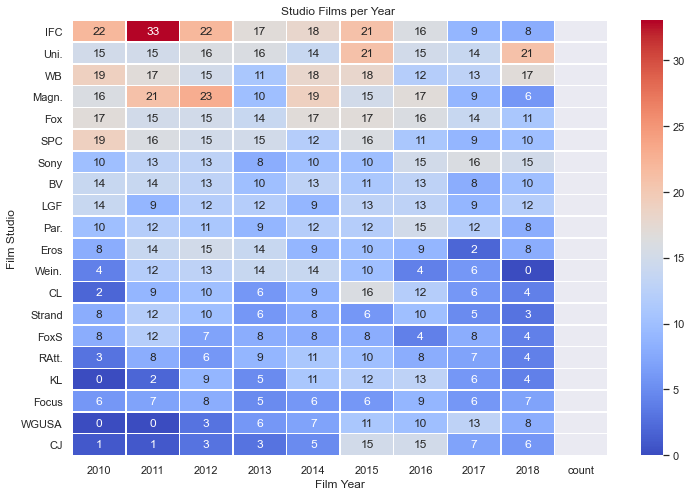

In [292]:
mask=[False, False, False, False, False, False, 
                       False, False, False,True]
# use Seaborn styles
sns.set()
fig, ax9 = plt.subplots(figsize=(12, 8))

ax9 = sns.heatmap(annot=True, fmt="d", linewidths=.5,data=testpiv, ax=ax9, cmap='coolwarm',mask=mask)
ax9.set(xlabel = 'Film Year', ylabel='Film Studio', title='Studio Films per Year ')
plt.show()



In [293]:
# of the Successful movies number per year
#df_studios_bud_genres['studio'].value_counts())
df_studio_budget_pivott = df_studios_bud_genres.pivot_table(index='studio' ,values='worldwide_gross_x',
                                          columns='year',
                                          margins=True,margins_name='count',
                                          aggfunc='count',fill_value=0)

In [294]:
df_studio_budget_pivott.sort_values(['count'], ascending=[False], inplace=True)

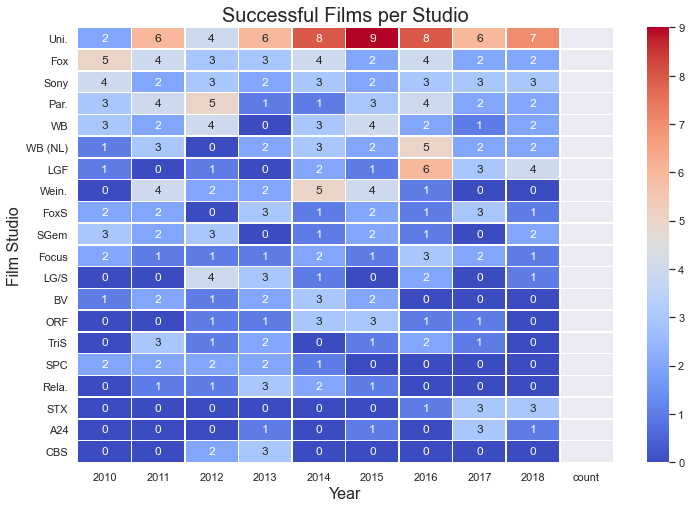

In [303]:
mask=[False, False, False, False, False, False, 
                       False, False, False,True]
# use Seaborn styles
sns.set()
fig, ax10 = plt.subplots(figsize=(12, 8))

ax10 = sns.heatmap(annot=True, fmt="d", linewidths=.5,data=df_studio_budget_pivott[1:21], ax=ax10, cmap='coolwarm',mask=mask)

ax10.set_xlabel(xlabel = 'Year', fontsize=16)
ax10.set_ylabel(ylabel='Film Studio', fontsize=16)
ax10.set_title(label='Successful Films per Studio', fontsize=20)



fig.savefig('./images/SuccessFilmsYear.png', bbox_inches='tight')
plt.show()

__Conclusion:__  With a max of 9 successful films a year is spectacular, a safe bet looks to be 3 to 5 starting out.


***

***

***

### Question:  What are the sources of the movies?

We scraped some data from TheNumbers which had the source material.


In [305]:
df_movie_source = pd.read_csv('./data/tn_moviesource.csv',index_col = 0, encoding='utf8')

In [306]:
df_movie_source['Source'].value_counts()

Original Screenplay                    752
Based on Fiction Book/Short Story      215
Based on Real Life Events              145
Based on Factual Book/Article           79
Remake                                  49
Based on Play                           24
Based on Comic/Graphic Novel            21
Based on TV                             19
Based on Game                           10
Based on Folk Tale/Legend/Fairytale      7
Based on Short Film                      7
Spin-Off                                 6
Based on Movie                           5
Based on Religious Text                  4
Based on Toy                             4
Based on Musical or Opera                3
Based on Musical Group                   2
Based on Web Series                      1
Based on Ballet                          1
Compilation                              1
Based on Song                            1
Name: Source, dtype: int64

In [307]:
df_budget_genre_ratings_source = pd.merge(df_budget_genre_ratings, df_movie_source, 
                            left_on=  ['movie'],
                            right_on= ['Title'], 
                            how = 'left')

In [308]:
df_budget_genre_ratings_source.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'profit_over_pb', 'roi_percent', 'x_times_invest',
       'start_year', 'genres', 'Animation', 'Biography', 'Adventure', 'Drama',
       'War', 'Documentary', 'Family', 'History', 'Horror', 'Fantasy',
       'Comedy', 'Musical', 'Crime', 'Romance', 'Music', 'Sci-Fi', 'Thriller',
       'Sport', 'Mystery', 'Western', 'Action', 'Title_x', 'mpaa_rating',
       'Released', 'Title_y', 'Source'],
      dtype='object')

In [314]:
#Drop Unneeded Columns
df_budget_genre_ratings_source.drop(columns=['Title','Released_y','Released_x', 'Title_y',
                                             'Source_x','Released_x', 'Title_y', 'Source_x'],inplace=True)

KeyError: "['Title' 'Released_y' 'Released_x' 'Source_x' 'Released_x' 'Source_x'] not found in axis"

In [312]:
df_budget_genre_ratings_source

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,start_year,genres,...,Thriller,Sport,Mystery,Western,Action,Title_x,mpaa_rating,Released,Title_y,Source
0,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,2010,[Horror],...,0.0,0.0,0.0,0.0,0.0,Paranormal Activity 2,R,"Oct 20, 2010",Paranormal Activity 2,Original Screenplay
1,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,2017,"[Horror, Mystery, Thriller]",...,1.0,0.0,1.0,0.0,0.0,Get Out,R,"Feb 24, 2017",Get Out,Original Screenplay
2,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,2011,"[Horror, Mystery, Thriller]",...,1.0,0.0,1.0,0.0,0.0,Paranormal Activity 3,R,"Oct 21, 2011",Paranormal Activity 3,Original Screenplay
3,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4,2013,"[Horror, Thriller]",...,1.0,0.0,0.0,0.0,0.0,The Purge,R,"Jun 7, 2013",The Purge,Original Screenplay
4,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4,2013,"[Horror, Thriller]",...,1.0,0.0,0.0,0.0,0.0,The Purge,R,"Jun 7, 2013",The Purge,Original Screenplay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,"Mar 4, 2011",The Adjustment Bureau,50200000.0,62495645.0,126931325.0,76731325.0,152.9,2.5,2011,"[Romance, Sci-Fi, Thriller]",...,1.0,0.0,0.0,0.0,0.0,The Adjustment Bureau,PG-13,"Mar 4, 2011",The Adjustment Bureau,Based on Fiction Book/Short Story
405,"Mar 18, 2011",Paul,40000000.0,37412945.0,101162106.0,61162106.0,152.9,2.5,2011,"[Adventure, Comedy, Sci-Fi]",...,0.0,0.0,0.0,0.0,0.0,Paul,R,"Mar 18, 2011",Paul,Original Screenplay
406,"Dec 25, 2014",Unbroken,65000000.0,115637895.0,163527824.0,98527824.0,151.6,2.5,2014,"[Biography, Drama, Sport]",...,0.0,1.0,0.0,0.0,0.0,Unbroken,PG-13,"Dec 25, 2014",Unbroken,Based on Factual Book/Article
407,"Dec 29, 2010",Another Year,8000000.0,3205706.0,20005613.0,12005613.0,150.1,2.5,2010,"[Comedy, Drama]",...,0.0,0.0,0.0,0.0,0.0,Another Year,PG-13,"Dec 29, 2010",Another Year,Original Screenplay


In [315]:

sourcecounts = df_budget_genre_ratings_source['Source'].value_counts(ascending=False).to_frame()

In [316]:
sourcecounts

,Source
Original Screenplay,213
Based on Fiction Book/Short Story,66
Based on Real Life Events,48
Based on Factual Book/Article,32
Remake,16
Based on Folk Tale/Legend/Fairytale,5
Based on TV,5
Based on Play,4
Based on Game,4
Based on Comic/Graphic Novel,4


__Conclusion:__ Original Screenplay 213 , Based on book or short story 66, Real Life Events 48

***
***
***

# Conclusions
Empower Studios Portfolio Strategy includes:
Either<br>
__Embrace R__  
Horror Mystery Thriller Highest ROI%<br>
Have the highest average return on Investment.<br>
or<br>
__Produce No R__
 Drama, Comedy and Romance, or any except Horror aka Disney Approach<br>
 
Both Plans include<br>
Produce 5 to 8 films per year in the <$20M budget Range<br>
Release in Summer or late Fall<br>
Looking for 50% Original Content 50% Book Source or Factual Events other

## Next Steps
Analysis of Successful Producers, Directors, Cinematographers, Actors<br>
Associating critical rating with success<br>
Academy Awards nominations with successful box office<br>